# Final Project Zheta: Statistika Deskriptif dan Prediksi Kelas Pembatalan Booking oleh Tamu yang Mereservasi Hotel

## Table of Content



1. Problem Analysis

  - 1.1 Problem Statement
  - 1.2 Objectives
  - 1.3 Key Questions
  - 1.4 Expected Outcomes

2. Exploratory Data Analysis (EDA)

  - 2.1 Data Overview
  - 2.2 Data Cleaning (Missing Values, Outliers, Inconsistent Data)
  - 2.3 Data Transformation (Encoding, Scaling, Type Conversion)

3. Analysis
  - 3.1 Descriptive Statistics and Data Visualizations
  - 3.2 Analysis and Recommendations

4. Model

  - 4.1 Variabel Drop & Data Splitting
  - 4.2 Data Preprocessing
  - 4.3 Benchmarking
  - 4.4 Hyperparameter Tuning
  - 4.5 Evaluation Modedl
  - 4.6 Feature Importance

5. Summary of Findings

  - 5.1 Key Insights
  - 5.2 Recommendations

## 1. Problem Analysis

Topik "Statistika Deskriptif dan Prediksi Kelas Pembatalan Booking oleh Tamu yang Mereservasi Hotel" bertujuan untuk memahami dan membentuk model prediksi pembatalan booking berdasarkan karakteristik tamu yang terdapat dalam dataset suatu Hotel Company (119.390 data). Dengan analisis dan model prediksi ini, kita dapat menggali perbedaan pola pemesanan, preferensi fasilitas, serta kebutuhan khusus dari tamu yang cancel ataupun tidak. Pemahaman yang lebih dalam tentang karakteristik tamu dapat membantu hotel dalam menyusun strategi layanan, pemasaran, serta pengaturan fasilitas yang lebih sesuai meminimalisir pembatalan booking hotel. Berikut adalah rincian dari aspek-aspek yang akan dikaji dalam problem analysis:





### 1.1 Problem Statement

Hospitality industry, termasuk hotel, memiliki operasi bisnis yang bergantung pada pemanfaatan aset yang optimal (kamar  hotel, kursi pesawat, dll). Namun, tamu-tamu yang telah memesan aset tersebut kadang melakukan pembatalan (cancel) akibat hal-hal tertentu. Hal ini menyebabkan ada aset yang tidak digunakan secara optimal dan menurunkan profit perusahaan.

Salah satu cara hospitality industry (dan hotel) menangani hal ini adalah dengan overbooking (menjual kepada lebih banyak pelanggan daripada aset yang tersedia). Akan tetapi, hal ini terkadang dapat membuat masalah jika semua pelanggan yang memesan kamar datang. Hotel perlu memberikan kompensasi ataupun mencari kamar pengganti buat pelanggan. Oleh karena itu, mencari tahu karakteristik pelanggan yang suka dan memprediksi apakah seorang pelanggan akan melakukan pembatalan adalah hal penting. Dalam kata lain:

*   Prediksi "cancel" terlalu banyak, maka hotel akan menjual kamar kepada terlalu banyak pelanggan (overbook) sehingga menyebabkan ketidakpuasaan bagi pelanggan yang tidak mendapatkan kamar.
*   Prediksi "cancel" terlalu sedikit, maka hotel menjual kamar kepada terlalu sedikit pelanggan (underbook) sehingga banyak kamar yang tidak terpakai/tersewa dan menurunkan profit.



### 1.2 Objectives

Tujuan utama dari proyek analisis ini adalah membantu hotel menghasilkan profit maksimum dengan sumber daya/aset yang mereka miliki berdasarkan faktor-faktor karakteristik dari data tamu pemesan kamar hotel. Secara detail:



1.   Melakukan Descriptive Analytics untuk memahami karakteristik pattern dan/atau trend pada tamu yang melakukan pembatalan. Faktor-faktor seperti price, period of stay, lead time, dll mungkin berperdan dalam menentukan apakah booking akan aman atau tidak.
2.   Memprediksi kemungkinan tamu cancel booking dengan model-model Machine Learning. Kemudian akan dilakukan evaluasi performa model dan memilih 2 model terbaik untuk hyperparameter tuning. Sesudah itu akan dipilih model terbaik untuk memprediksi pembatalan booking hotel.


### 1.3 Key Questions to Address

Beberapa pertanyaan utama yang akan dijawab dalam analisis ini meliputi:

- Faktor apa saja yang menyebabkan tamu cancel?
- Apakah terdapat perbedaan signifikan dalam durasi menginap, jumlah orang, atau permintaan fasilitas antara kategori tamu yang cancel booking dan tidak?
- Bagaimana pola pemesanan, seperti waktu pemesanan dan tingkat pembatalan, berbeda antara kategori tamu yang cancel booking dan tidak?


### 1.4 Expected Outcomes
- Model yang dapat memprediksi apakah tamu baru termasuk kategori yang mungkin melakukan cancel atau tidak berdasarkan variabel yang relevan.
- Wawasan tentang preferensi dan kebutuhan khusus dari setiap kategori, yang akan membantu hotel dalam mengembangkan strategi dan layanan yang lebih baik.
- Rekomendasi bagi tim manajemen hotel mengenai strategi optimal dalam menyusun penawaran, penetapan harga, dan kampanye pemasaran yang mengurangi peluang cancel tersebut.


## 2. Exploratory Data Analysis (EDA)

### 2.1 Introduction to Dataset

In [2]:
#import2 field
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from scipy.stats import kstest, shapiro
import plotly.graph_objects as go
import plotly.express as px
from scipy.stats import chi2_contingency


# import warnings
# warnings.filterwarnings("ignore")

In [3]:
# read data

data = pd.read_csv('/content/hotel_bookings.csv',  engine='python')

In [4]:
#info data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Attribute Information



* hotel: Jenis hotel (City atau Resort)
* is_canceled: Status pembatalan pemesanan
* lead_time: Waktu antara pemesanan dan tanggal check-in
* arrival_date_year: Tahun kedatangan
* arrival_date_month: Bulan kedatangan
* arrival_date_week_number: Nomor minggu kedatangan
* stays_in_weekend_nights: Jumlah malam menginap di akhir pekan
* stays_in_week_nights: Jumlah malam menginap pada hari kerja
* adults: Jumlah orang dewasa
* children: Jumlah anak-anak
* babies: Jumlah bayi
* meal: Jenis paket makanan yang dipesan
* country: Negara asal tamu
* market_segment: Segmen pasar (misalnya, bisnis atau leisure)
* distribution_channel: Saluran pemesanan
* is_repeated_guest: Status tamu berulang
* previous_cancellations: Jumlah pembatalan sebelumnya
* previous_bookings_not_canceled: Jumlah pemesanan sebelumnya yang tidak dibatalkan
* reserved_room_type: Jenis kamar yang dipesan
* assigned_room_type: Jenis kamar yang diberikan
* booking_changes: Jumlah perubahan dalam pemesanan
* deposit_type: Jenis deposit yang digunakan
* days_in_waiting_list: Jumlah hari di daftar tunggu
* customer_type: Jenis tamu (misalnya, Transient, Group)
* adr: Rata-rata harga harian (Average Daily Rate)
* required_car_parking_spaces: Jumlah tempat parkir yang diminta
* total_of_special_requests: Total permintaan khusus

**Target Variable** (Y)

Y: Variabel target yang ingin diprediksi adalah kategori tamu, yaitu:

- `customer_type` atau `market_segment`


### 2.2 Data Cleaning

Handling Missing Values and Duplicates

In [5]:
#cek null data
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
reservation_status_date                0
dtype: int64

In [6]:
# Mengecek jumlah baris yang duplikat
duplicate_rows = data[data.duplicated()]

print(f"Jumlah baris duplikat: {duplicate_rows.shape[0]}")

if duplicate_rows.shape[0] > 0:
    display(duplicate_rows.head())
else:
    print("Tidak ada baris duplikat yang ditemukan.")


Jumlah baris duplikat: 31994


hotel  is_canceled  lead_time  arrival_date_year  \
5    Resort Hotel            0         14               2015   
22   Resort Hotel            0         72               2015   
43   Resort Hotel            0         70               2015   
138  Resort Hotel            1          5               2015   
200  Resort Hotel            0          0               2015   

    arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
5                 July                        27                          1   
22                July                        27                          1   
43                July                        27                          2   
138               July                        28                          5   
200               July                        28                          7   

     stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
5                          0                     2       2  ...    No Deposit   
22                         2                     4       2  ...    No Deposit   
43                         2                     3       2  ...    No Deposit   
138                        1                     0       2  ...    No Deposit   
200                        0                     1       1  ...    No Deposit   

     agent company days_in_waiting_list customer_type     adr  \
5    240.0     NaN                    0     Transient   98.00   
22   250.0     NaN                    0     Transient   84.67   
43   250.0     NaN                    0     Transient  137.00   
138  240.0     NaN                    0     Transient   97.00   
200  240.0     NaN                    0     Transient  109.80   

     required_car_parking_spaces  total_of_special_requests  \
5                              0                          1   
22                             0                          1   
43                             0                          1   
138                            0                          0   
200                            0                          3   

     reservation_status reservation_status_date  
5             Check-Out              2015-07-03  
22            Check-Out              2015-07-07  
43            Check-Out              2015-07-07  
138            Canceled              2015-07-01  
200           Check-Out              2015-07-08  

[5 rows x 32 columns]

In [7]:
# Menghapus baris duplikat dari DataFrame 'data'
data.drop_duplicates(inplace=True)

duplicate_count_after = data.duplicated().sum()
print(f"Jumlah duplikat setelah drop: {duplicate_count_after}")

data.info()


Jumlah duplikat setelah drop: 0
<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal

#### Keeping only relevant variables

Akan dilakukan setelah analisis deskriptif dulu

### 2.3 Data Transformation



Terlihat beberapa kolom memiliki dtype yang kurang sesuai dengan data mereka, kita akan mengubahnya yakni

*   float to int: **children** (jumlah anak)
*   variabel baru: **company, agent** (ID company, agent akan dibuat jadi apakah dari company, apakah menggunakan agent)
*   variabel baru dari kombinasi variabel: **arrival_date, total_guests, total_stays** (dari arrival_date day, month, year | adults, children, dan babies | stays_in_week_nights dan stays_in_weekend_nights)

In [8]:
#kolom Children, asumsikan data NA = 0 (tidak punya anak)
data['children'] = data['children'].fillna(0)
data['children'] = data['children'].astype(int)

In [9]:
#variabel from_company dan from_agent dengan isi Yes jika ada isinya dan No jika NULL or NA
data['from_company'] = data['company'].apply(lambda x: 'Yes' if pd.notna(x) and x != 0 else 'No')
data['from_agent'] = data['company'].apply(lambda x: 'Yes' if pd.notna(x) and x != 0 else 'No')

In [10]:
list_info = []
for col in data.columns:
    list_info.append([col, data[col].dtype, len(data), data[col].isna().sum(), round((data[col].isna().sum()/len(data[col]))*100,2),
    data[col].nunique(), data[col].unique()])

data_info = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value',
    '% Missing Value', '# Unique', 'Sample Data'],
    data = list_info)

data_info.sort_values(by=['Data Type']).reset_index(drop=True)

Column Name Data Type  Data Count  Missing Value  \
0                is_repeated_guest     int64       87396              0   
1             days_in_waiting_list     int64       87396              0   
2   previous_bookings_not_canceled     int64       87396              0   
3           previous_cancellations     int64       87396              0   
4      required_car_parking_spaces     int64       87396              0   
5        total_of_special_requests     int64       87396              0   
6                  booking_changes     int64       87396              0   
7                         children     int64       87396              0   
8                           adults     int64       87396              0   
9                           babies     int64       87396              0   
10         stays_in_weekend_nights     int64       87396              0   
11       arrival_date_day_of_month     int64       87396              0   
12        arrival_date_week_number     int64       87396              0   
13               arrival_date_year     int64       87396              0   
14                       lead_time     int64       87396              0   
15                     is_canceled     int64       87396              0   
16            stays_in_week_nights     int64       87396              0   
17                             adr   float64       87396              0   
18                         company   float64       87396          82137   
19                           agent   float64       87396          12193   
20              reservation_status    object       87396              0   
21         reservation_status_date    object       87396              0   
22                   customer_type    object       87396              0   
23                           hotel    object       87396              0   
24              assigned_room_type    object       87396              0   
25              reserved_room_type    object       87396              0   
26                    from_company    object       87396              0   
27            distribution_channel    object       87396              0   
28                  market_segment    object       87396              0   
29                         country    object       87396            452   
30                            meal    object       87396              0   
31              arrival_date_month    object       87396              0   
32                    deposit_type    object       87396              0   
33                      from_agent    object       87396              0   

    % Missing Value  # Unique  \
0              0.00         2   
1              0.00       128   
2              0.00        73   
3              0.00        15   
4              0.00         5   
5              0.00         6   
6              0.00        21   
7              0.00         5   
8              0.00        14   
9              0.00         5   
10             0.00        17   
11             0.00        31   
12             0.00        53   
13             0.00         3   
14             0.00       479   
15             0.00         2   
16             0.00        35   
17             0.00      8879   
18            93.98       352   
19            13.95       333   
20             0.00         3   
21             0.00       926   
22             0.00         4   
23             0.00         2   
24             0.00        12   
25             0.00        10   
26             0.00         2   
27             0.00         5   
28             0.00         8   
29             0.52       177   
30             0.00         5   
31             0.00        12   
32             0.00         3   
33             0.00         2   

                                          Sample Data  
0                                              [0, 1]  
1   [0, 50, 47, 65, 122, 75, 101, 150, 125, 14, 60...  
2   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
3   [0, 1, 2, 3, 

In [11]:
#variabel arrival_date dan total_guests
data['arrival_date'] = pd.to_datetime(data[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].astype(str).agg('-'.join, axis=1))
data['total_guests'] = data['adults'] + data['children'] + data['babies']
data['total_stays'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  object        
 1   is_canceled                     87396 non-null  int64         
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_year               87396 non-null  int64         
 4   arrival_date_month              87396 non-null  object        
 5   arrival_date_week_number        87396 non-null  int64         
 6   arrival_date_day_of_month       87396 non-null  int64         
 7   stays_in_weekend_nights         87396 non-null  int64         
 8   stays_in_week_nights            87396 non-null  int64         
 9   adults                          87396 non-null  int64         
 10  children                        87396 non-null  int64         
 11  babies

##Analysis

Kita akan melakukan Descriptive Analytics untuk memahami karakteristik pattern dan/atau trend pada tamu yang melakukan pembatalan. Faktor-faktor seperti price, period of stay, lead time, dll mungkin berperdan dalam menentukan apakah booking akan aman atau tidak

### 3.1 Descriptive Statistics and Data Visualization

Kita akan melihat pengaruh fitur-fitur lain terhadap variabel "is_canceled".


####Reservation Status

Didapatkan informasi: Sekitar 26% tamu (23,011 orang) melakukan cancel booking.

In [12]:
reservation_status = data['reservation_status'].value_counts()
fig = go.Figure(data=[go.Pie(labels=reservation_status.index, values=reservation_status, opacity=0.8)])
fig.update_traces(textinfo='percent+label', marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Reservation Status', title_x=0.5, title_font=dict(size=32))
fig.show()

####Adults, Children, and Babies

Didapatkan informasi:

1.

  Jumlah Adult di city hotel ialah 100,249, hampir 2x lipat dari resort hotels sebanyak 63,688.

  Jumlah Children di city hotel ialah 7,044, lebih dari resort hotel dengan 5,072.

  Jumlah Baby di city hotel adalah 392, kurang dari resort hotel dengan 555.

2. Secara amount, cancellation paling banyak pada tamu tanpaa anak/bayi (karena jumlahnya banyak).

3. Secara rate, Cancellation Rates lebih tinggi apabila tamu punya anak atau bayi (children and/or babies). Hal ini karena jumlah tamu yang punya anak atau bayi lebih sedikit.


In [13]:
#Comparing the number of visitors for guests for city hotels and resort hotels
adult=pd.crosstab(index=data['hotel'], columns='Adults', values=data['adults'], aggfunc=('sum'))
children=pd.crosstab(index=data['hotel'], columns='Children', values=data['children'], aggfunc=('sum')).astype('int64')
babies=pd.crosstab(index=data['hotel'], columns='Babies', values=data['babies'], aggfunc=('sum'))
guests=pd.concat((adult, children,babies), axis=1).T
pd.concat((adult, children,babies), axis=1)


col_0         Adults  Children  Babies
hotel                                 
City Hotel    100249      7044     392
Resort Hotel   63688      5072     554

<Figure size 500x500 with 0 Axes>

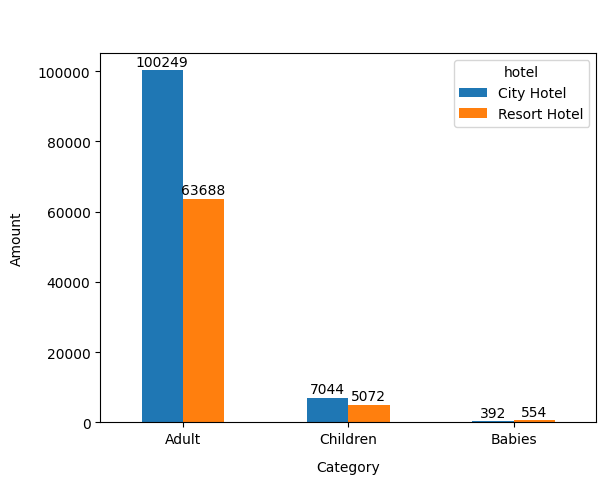

In [14]:
plt.figure(figsize=(5,5))
ax=guests.plot(kind='bar')
for i in range(2):
    ax.bar_label(ax.containers[i], label_type='edge', padding=1)
plt.xticks(np.arange(3),['Adult','Children','Babies'],rotation=0)
plt.yticks(np.arange(0,120_000,20_000))
plt.title(' ', pad=20, size=15)
plt.xlabel('Category', labelpad=10, size=10)
plt.ylabel('Amount', labelpad=10, size=10)

plt.show()

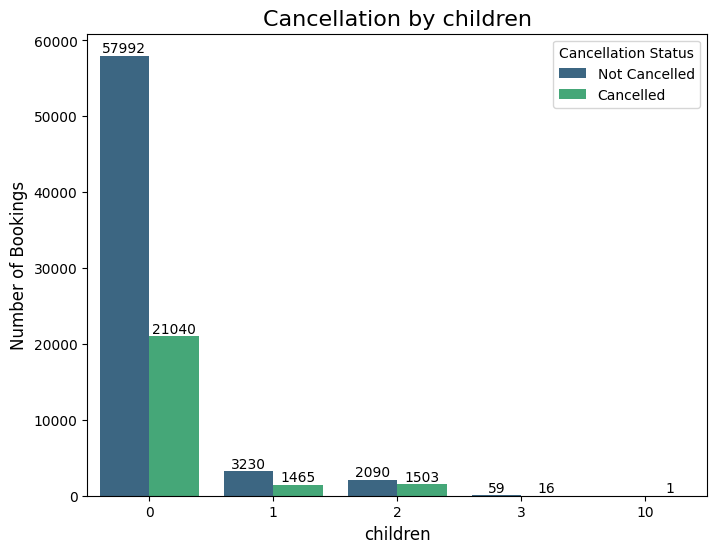

In [15]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='children', hue='is_canceled', data=data, order=sorted(data['children'].unique()), palette='viridis')
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
plt.title('Cancellation by children', fontsize=16)
plt.xlabel('children', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Cancellation Status', labels=['Not Cancelled', 'Cancelled'], fontsize=10)
plt.show()

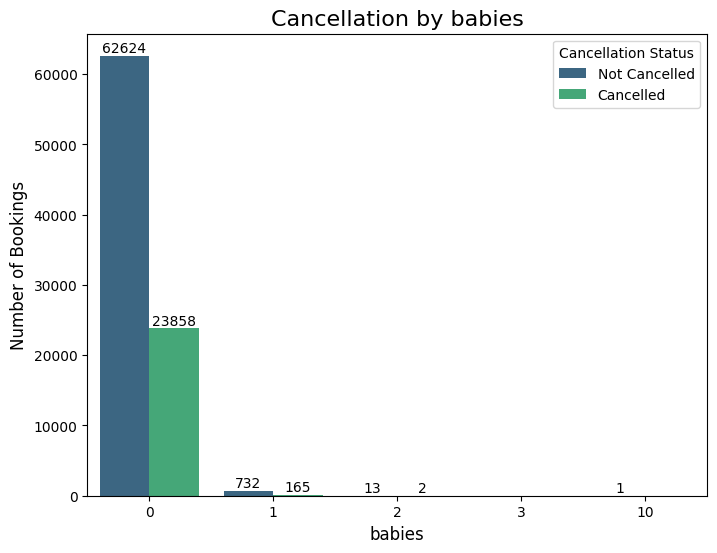

In [16]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='babies', hue='is_canceled', data=data, order=sorted(data['children'].unique()), palette='viridis')
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
plt.title('Cancellation by babies', fontsize=16)
plt.xlabel('babies', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Cancellation Status', labels=['Not Cancelled', 'Cancelled'], fontsize=10)
plt.show()

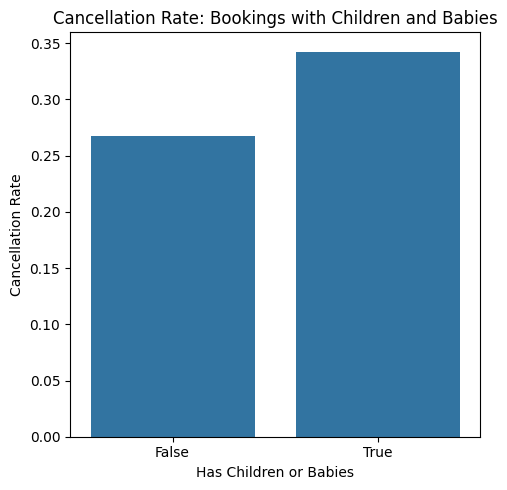

In [17]:
data['has_children_or_babies'] = (data['children'] > 0) | (data['babies'] > 0)
children_babies_cancellation_rates = data.groupby('has_children_or_babies')['is_canceled'].mean().reset_index()

plt.figure(figsize=(5, 5))
sns.barplot(x='has_children_or_babies', y='is_canceled', data=children_babies_cancellation_rates)
plt.title('Cancellation Rate: Bookings with Children and Babies')
plt.xlabel('Has Children or Babies')
plt.ylabel('Cancellation Rate')
plt.tight_layout()
plt.show()

####Hotel Type

Didapatkan informasi:


1. Kebanyakan tamu menginap dalam jangka 1-4 hari di semua hotel.

   Modus stay bagi tamu City Hotel adalah 3 hari.

   Modus stay bagi tamu Resort Hotel adalah 1 hari dan 7 hari (cenderung lebih variatif dari nilai rata-rata 3 hari).

2. City hotels memperlihatkan cancellation amount dan rate yang lebih tinggi daripada resort hotels.
3.   Jumlah tamu City hotels (61.13% dari total data) juga lebih banyak daripada resort hotels.



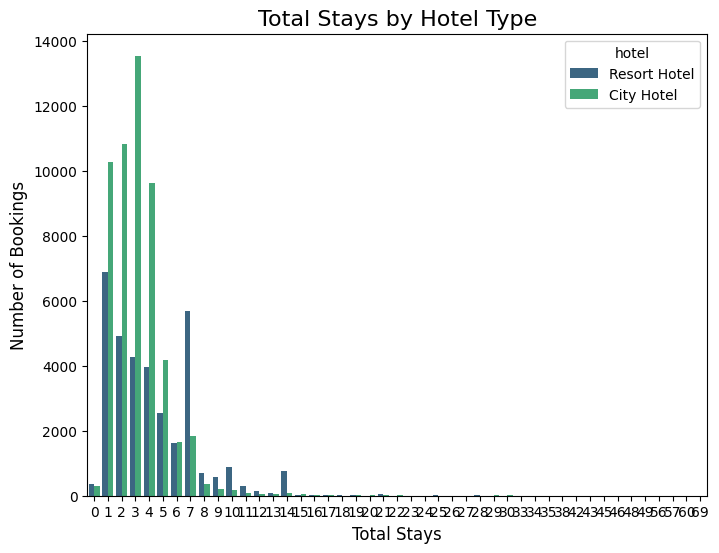

In [18]:
# Improved visualization for hotel type and length of stay
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='total_stays', hue='hotel', data=data, order=sorted(data['total_stays'].unique()), palette='viridis')
#x.bar_label(ax.containers[0], label_type='edge')
#ax.bar_label(ax.containers[1], label_type='edge')
plt.title('Total Stays by Hotel Type', fontsize=16)
plt.xlabel('Total Stays', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [19]:
pd.crosstab(index=data['hotel'], columns=data['total_stays']>3)

total_stays   False  True 
hotel                     
City Hotel    34948  18480
Resort Hotel  16471  17497

In [20]:
pd.crosstab(index=data['hotel'], columns=data['total_stays']>3, normalize=True)*100

total_stays     False      True 
hotel                           
City Hotel    39.9881  21.145133
Resort Hotel  18.8464  20.020367

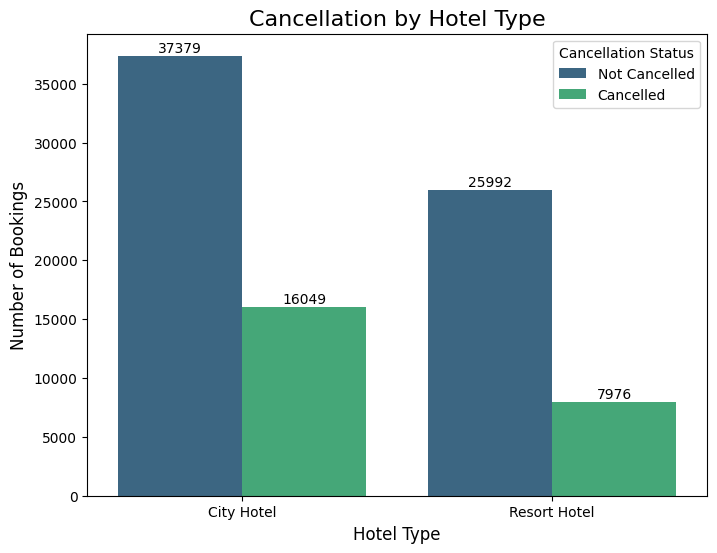

In [21]:
# Improved visualization for hotel type and cancellation rate
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='hotel', hue='is_canceled', data=data, order=sorted(data['hotel'].unique()), palette='viridis')
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
plt.title('Cancellation by Hotel Type', fontsize=16)
plt.xlabel('Hotel Type', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Cancellation Status', labels=['Not Cancelled', 'Cancelled'], fontsize=10)
plt.show()

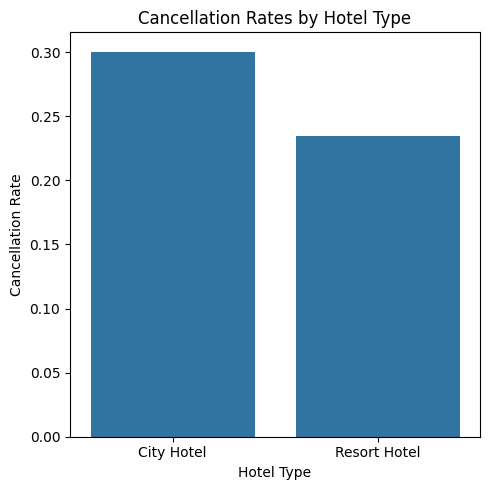

In [22]:
hotel_cancellation_rates = data.groupby('hotel')['is_canceled'].mean().reset_index()

plt.figure(figsize=(5, 5))
sns.barplot(x='hotel', y='is_canceled', data=hotel_cancellation_rates)
plt.title('Cancellation Rates by Hotel Type')
plt.ylabel('Cancellation Rate')
plt.xlabel('Hotel Type')
plt.tight_layout()
plt.show()

In [23]:
(pd.crosstab(data['hotel'], data['is_canceled'], normalize=False, margins=True, margins_name='Total')/len(data) * 100).round(2)

is_canceled       0      1   Total
hotel                             
City Hotel    42.77  18.36   61.13
Resort Hotel  29.74   9.13   38.87
Total         72.51  27.49  100.00

In [24]:
(pd.crosstab(data['hotel'], data['is_canceled'], normalize=False, margins=True, margins_name='Total')).round(2)

is_canceled       0      1  Total
hotel                            
City Hotel    37379  16049  53428
Resort Hotel  25992   7976  33968
Total         63371  24025  87396

In [25]:
res_hotel_data = data[data['hotel'] == 'Resort Hotel']
avg_res_nights = res_hotel_data['total_stays'].mean()
max_res_nights = res_hotel_data['total_stays'].max()

city_hotel_data = data[data['hotel'] == 'City Hotel']
avg_city_nights = city_hotel_data['total_stays'].mean()
max_city_nights = city_hotel_data['total_stays'].max()

print(f"On average, guests of the Resort hotel reserve the hotel for a stay of {avg_res_nights:.2f} nights, and {max_res_nights} at maximum.")
print(f"On average, guests of the City hotel reserve the hotel for a stay of {avg_city_nights:.2f} nights, and {max_city_nights} at maximum.")

On average, guests of the Resort hotel reserve the hotel for a stay of 4.39 nights, and 69 at maximum.
On average, guests of the City hotel reserve the hotel for a stay of 3.15 nights, and 57 at maximum.


####Deposit Type
Didapatkan informasi:

1.   Tamu tanpa deposit (No Deposit) mendominasi, sebanyak 98.7% dari semua tamu.
2.   Tamu 'No Deposit' cenderung memiliki jumlah cancellation lebih tinggi karena tamunya juga banyak (26% dari semua tamu).
3. Secara Persentase, jumlah tamu 'Non Refund' yang cancel lebih banyak daripada 'No Deposit' karena jumlah orangnya yang tidak banyak (1.2%)
4. Tamu 'City Hotel' dan 'No Deposit' paling banyak melakukan cancel.
5. Berdasarkan uji Chi-Square Test of Independence, terdapat hubungan antara variabel Deposit Type dan Cancellation (an association between categorical variables).

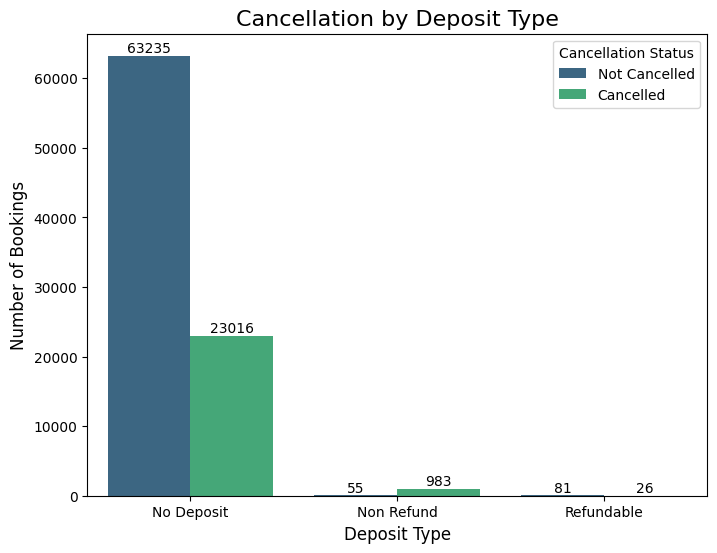

In [26]:
# Improved visualization for deposit type and cancellation rate
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='deposit_type', hue='is_canceled', data=data, order=sorted(data['deposit_type'].unique()), palette='viridis')
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
plt.title('Cancellation by Deposit Type', fontsize=16)
plt.xlabel('Deposit Type', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Cancellation Status', labels=['Not Cancelled', 'Cancelled'], fontsize=10)
plt.show()

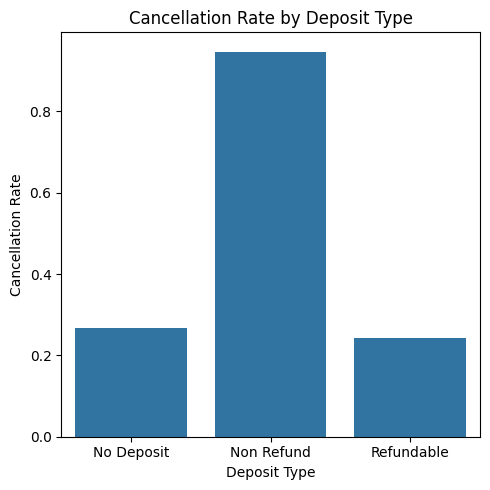

In [27]:
deposit_cancellation_rates = data.groupby('deposit_type')['is_canceled'].mean().reset_index()
plt.figure(figsize=(5, 5))
sns.barplot(x='deposit_type', y='is_canceled', data=deposit_cancellation_rates)
plt.title('Cancellation Rate by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Cancellation Rate')
plt.tight_layout()
plt.show()

In [28]:
(pd.crosstab(data['deposit_type'], data['is_canceled'], normalize=False, margins=True, margins_name='Total')/len(data) * 100).round(2)

is_canceled       0      1   Total
deposit_type                      
No Deposit    72.35  26.34   98.69
Non Refund     0.06   1.12    1.19
Refundable     0.09   0.03    0.12
Total         72.51  27.49  100.00

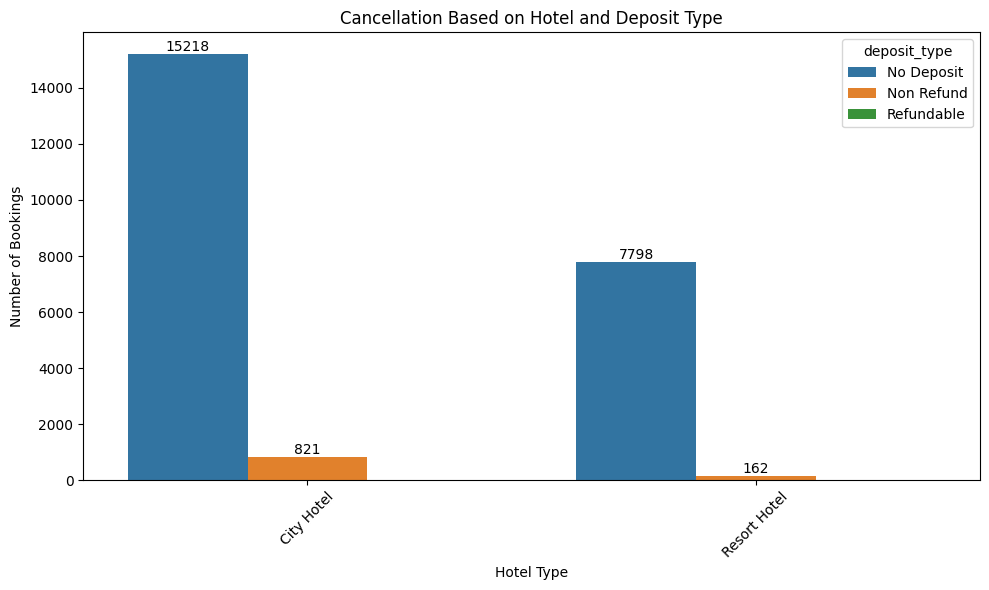

In [29]:
canceled_bookings = data[data['is_canceled'] == 1]
cancellation_rates = canceled_bookings.groupby(['hotel', 'deposit_type'])['is_canceled'].count().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='hotel', y='is_canceled', hue='deposit_type', data=cancellation_rates)
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
plt.title('Cancellation Based on Hotel and Deposit Type')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [30]:
chisquare_tab = (pd.crosstab(data['deposit_type'], data['is_canceled'], normalize=False, margins=False))
chisquare_tab

is_canceled       0      1
deposit_type              
No Deposit    63235  23016
Non Refund       55    983
Refundable       81     26

In [31]:
stats, pval, dof, exp = chi2_contingency(chisquare_tab)
if pval <= 0.05:
    print('Variabel Dependent is with Each Other')
else:
    print('Variabel Independent is from Each Other')

Variabel Dependent is with Each Other


####Market Segment dan Dist. Channels

Didapatkan informasi:
   
1.   Segment 'Online TA' memiliki booking terbanyak (59%), dengan cancellation amount dan rate yang paling tinggi. 'Groups', dan 'Aviation' mengikuti secara cancellation rate.
2.   Channel TA/TO memiliki memiliki booking terbanyak (79%), dengan cancellation amount dan rate paling  tinggi.



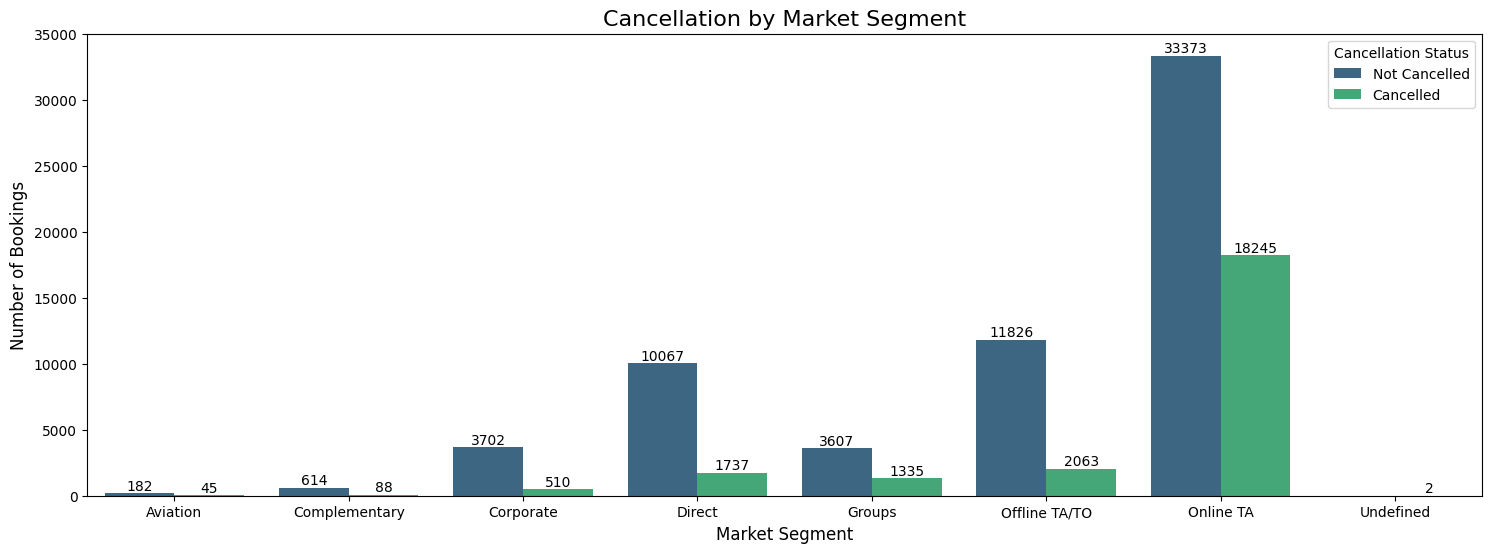

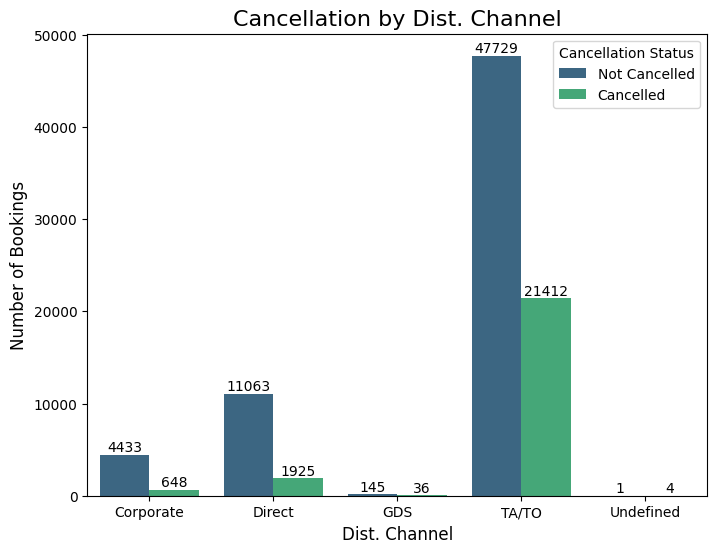

In [32]:
# Improved visualization for Market Segment or Dist.Channels and cancellation rate
plt.figure(figsize=(18, 6))
ax = sns.countplot(x='market_segment', hue='is_canceled', data=data, order=sorted(data['market_segment'].unique()), palette='viridis')
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
plt.title('Cancellation by Market Segment', fontsize=16)
plt.xlabel('Market Segment', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Cancellation Status', labels=['Not Cancelled', 'Cancelled'], fontsize=10)
plt.show()

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='distribution_channel', hue='is_canceled', data=data, order=sorted(data['distribution_channel'].unique()), palette='viridis')
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
plt.title('Cancellation by Dist. Channel', fontsize=16)
plt.xlabel('Dist. Channel', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Cancellation Status', labels=['Not Cancelled', 'Cancelled'], fontsize=10)
plt.show()

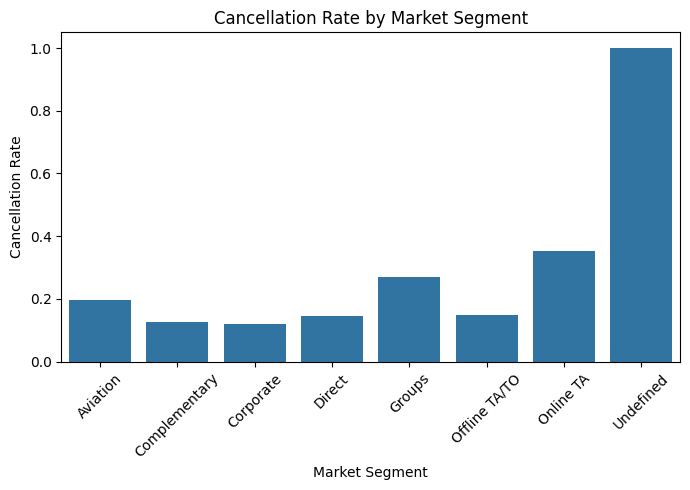

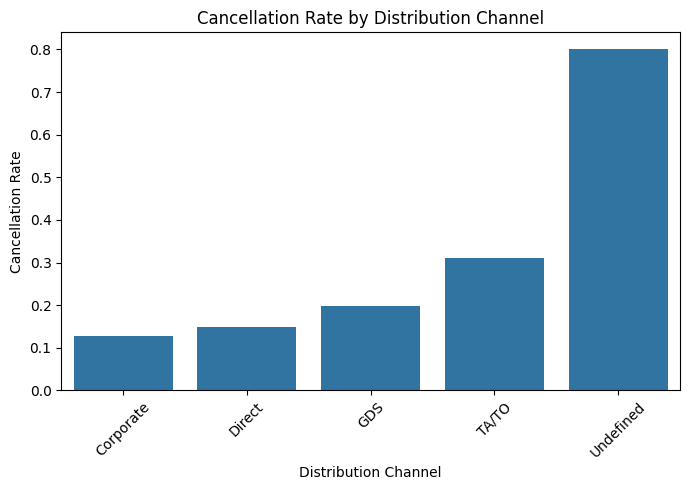

In [33]:
market_segment_cancellation_rates = data.groupby('market_segment')['is_canceled'].mean().reset_index()
distribution_channel_cancellation_rates = data.groupby('distribution_channel')['is_canceled'].mean().reset_index()

plt.figure(figsize=(7, 5))
sns.barplot(x='market_segment', y='is_canceled', data=market_segment_cancellation_rates)
plt.title('Cancellation Rate by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))
sns.barplot(x='distribution_channel', y='is_canceled', data=distribution_channel_cancellation_rates)
plt.title('Cancellation Rate by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
(pd.crosstab(data['market_segment'], data['is_canceled'], normalize=False, margins=True, margins_name='Total')/len(data) * 100).round(2)

is_canceled         0      1   Total
market_segment                      
Aviation         0.21   0.05    0.26
Complementary    0.70   0.10    0.80
Corporate        4.24   0.58    4.82
Direct          11.52   1.99   13.51
Groups           4.13   1.53    5.65
Offline TA/TO   13.53   2.36   15.89
Online TA       38.19  20.88   59.06
Undefined        0.00   0.00    0.00
Total           72.51  27.49  100.00

In [35]:
(pd.crosstab(data['distribution_channel'], data['is_canceled'], normalize=False, margins=True, margins_name='Total')/len(data) * 100).round(2)

is_canceled               0      1   Total
distribution_channel                      
Corporate              5.07   0.74    5.81
Direct                12.66   2.20   14.86
GDS                    0.17   0.04    0.21
TA/TO                 54.61  24.50   79.11
Undefined              0.00   0.00    0.01
Total                 72.51  27.49  100.00

####Lead Time

Didapatkan informasi:
Terdapat korelasi positif antara lead time yang panjang dan kenaikan cancellation rates, dimana tamu yang cancel cenderung memiliki lead time lebih tinggi

In [36]:
# Interactive lead time plot
fig = px.histogram(data, x="lead_time", color="is_canceled",
                   nbins=50,  # Adjust the number of bins as needed
                   title="Lead Time Distribution by Cancellation Status",
                   labels={"lead_time": "Lead Time (days)",
                           "is_canceled": "Cancellation Status",
                           "count": "Number of Bookings"},
                   marginal="box",  # Add a box plot for marginal distribution
                   color_discrete_sequence=["green", "red"])  # Customize colors


fig.show()

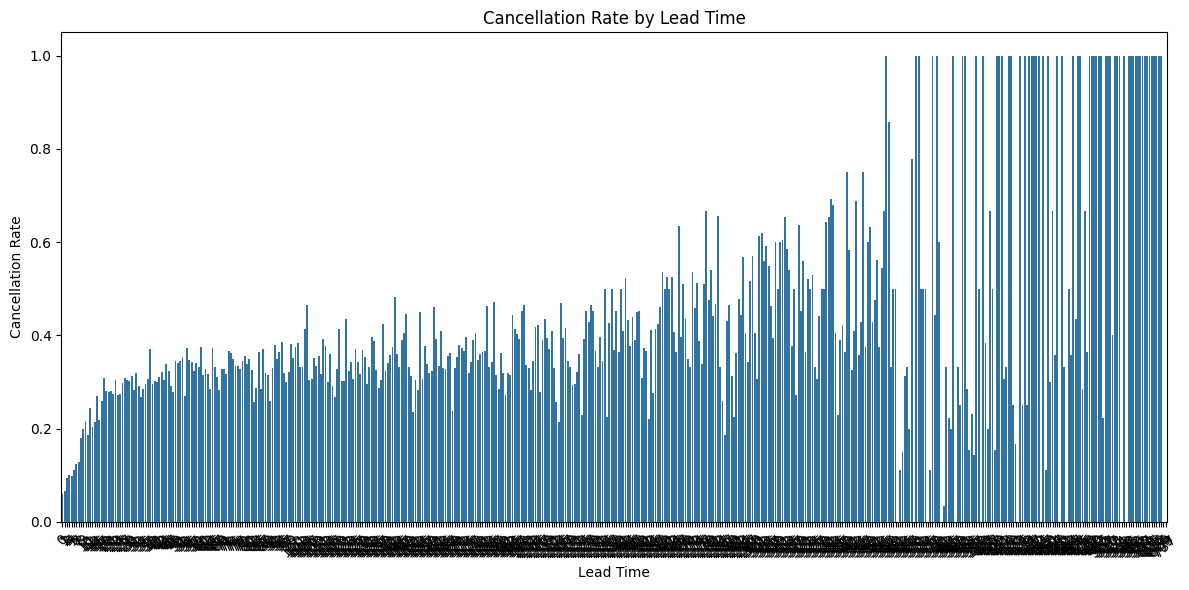

In [37]:
lead_time_cancellation_rates = data.groupby('lead_time')['is_canceled'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='lead_time', y='is_canceled', data=lead_time_cancellation_rates)
plt.title('Cancellation Rate by Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-38-5aaf660e635d>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



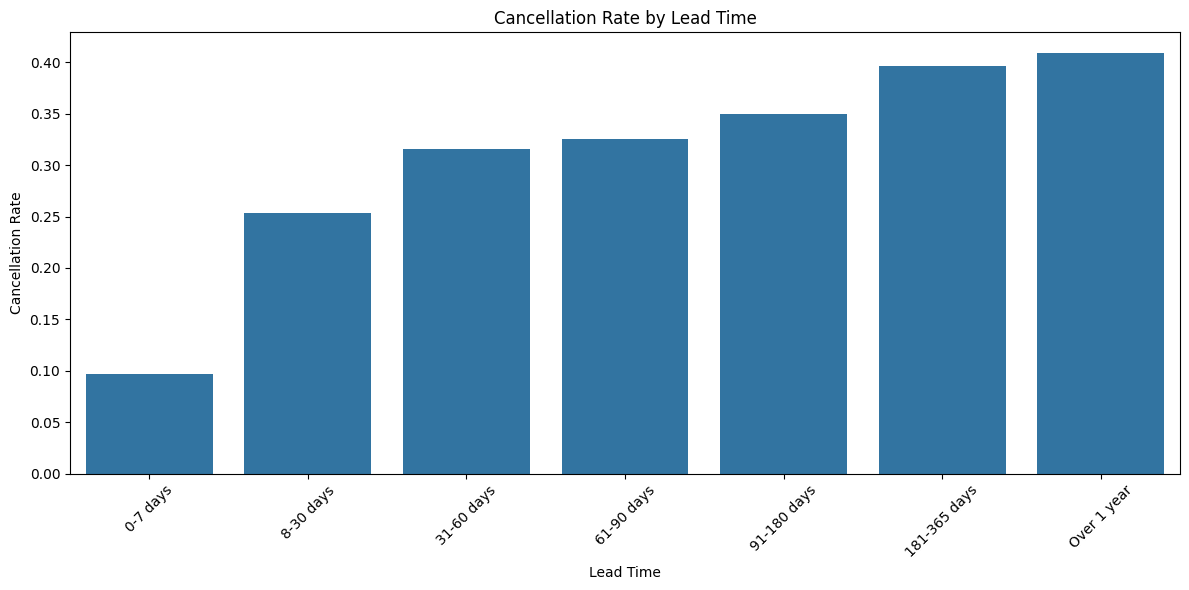

In [38]:
data['lead_time_bin'] = pd.cut(data['lead_time'], bins=[0, 7, 30, 60, 90, 180, 365, data['lead_time'].max()], labels=['0-7 days', '8-30 days', '31-60 days', '61-90 days', '91-180 days', '181-365 days', 'Over 1 year'])
lead_time_cancellation_rates = data.groupby('lead_time_bin')['is_canceled'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='lead_time_bin', y='is_canceled', data=lead_time_cancellation_rates)
plt.title('Cancellation Rate by Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

####Seasonal Pattern from Arrival Date

Didapatkan informasi:
1. Pattern Seasonal bagi booking Tamu (naik dari awal tahun hingga pertengahan tahun, lalu menurun hingga akhir tahun).
2. Pattern hubungan antara arrival_date_year, arrival_date_month, dan cancellation amount terlihat menaik dari awal tahun ke tengah tahun, dan kembali menurun. Pattern ini mengikuti jumlah booking tamu.
3. Tidak terlihat pattern hubungan antara arrival_date_year, arrival_date_month, dan cancellation rates. Hal ini diakibatkan bahwa data tahun 2015 memperlihatkan trend menurun, sedangkan trend 2016 dan 2017 adalah naik.

In [39]:
data_h = data[['arrival_date', 'adults', 'children','babies']].copy()
data_resorth = data_h[data['hotel'] == 'Resort Hotel']
data_cityh = data_h[data['hotel'] == 'City Hotel']

data_resorth = data_resorth.set_index("arrival_date")
data_cityh = data_cityh.set_index("arrival_date")

data_resorth = data_resorth.resample('ME').sum()
data_cityh = data_cityh.resample('ME').sum()

fig = go.Figure()
fig.add_trace(go.Scatter(x=data_resorth.index, y=data_resorth['adults'] + data_resorth['children'] + data_resorth['babies'],
                         name="Guests in Resort Hotels",
                         ))
fig.add_trace(go.Scatter(x=data_cityh.index, y=data_cityh['adults'],
                         name="Guests in City Hotels",
                         ))
fig.update_layout(title_text='Number of Guests by Hotels',
                  title_x=0.5, title_font=dict(size=30))  # Location and the font size of the main title
fig.update_layout(
    xaxis_title="Arrival Date",
    yaxis_title="Number of Guests")

fig.show()

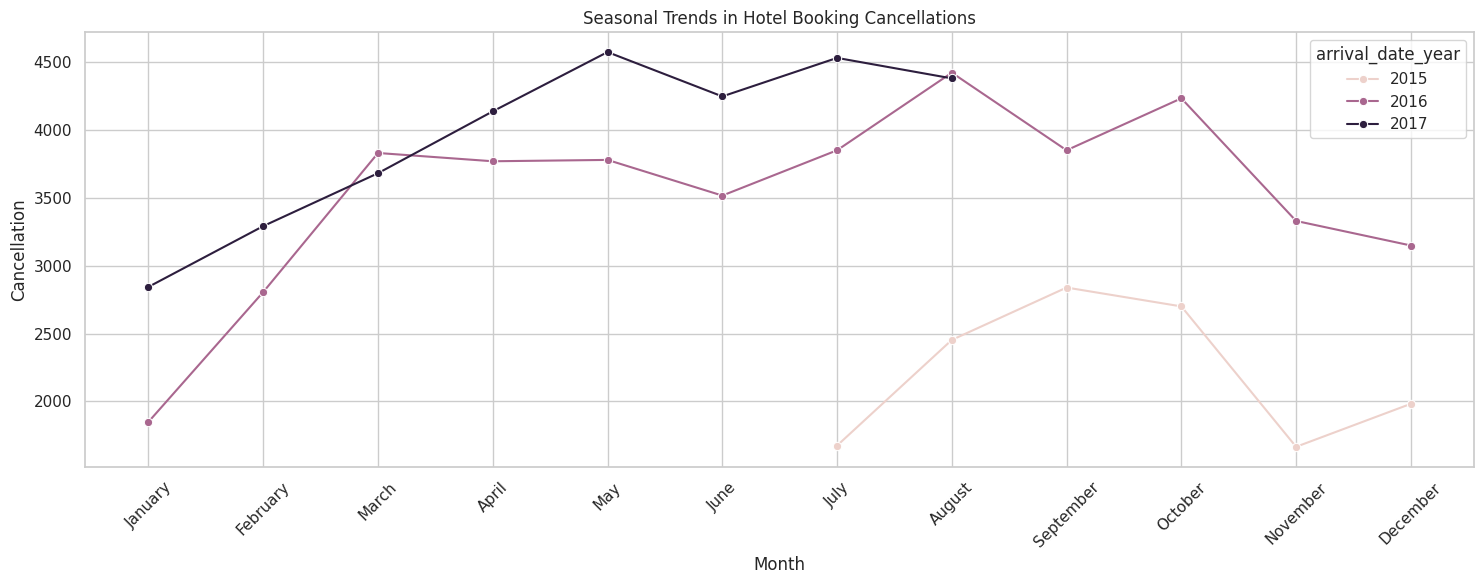

In [40]:
sns.set(style="whitegrid")

monthly_cancellation_rates = data.groupby(['arrival_date_year', 'arrival_date_month'])['is_canceled'].count().reset_index()
months_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
monthly_cancellation_rates['arrival_date_month'] = pd.Categorical(monthly_cancellation_rates['arrival_date_month'], categories=months_order, ordered=True)
monthly_cancellation_rates.sort_values(by=['arrival_date_year', 'arrival_date_month'], inplace=True)

plt.figure(figsize=(15, 6))
sns.lineplot(x="arrival_date_month", y="is_canceled", hue="arrival_date_year", data=monthly_cancellation_rates, marker="o")
plt.title("Seasonal Trends in Hotel Booking Cancellations")
plt.xlabel("Month")
plt.ylabel("Cancellation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

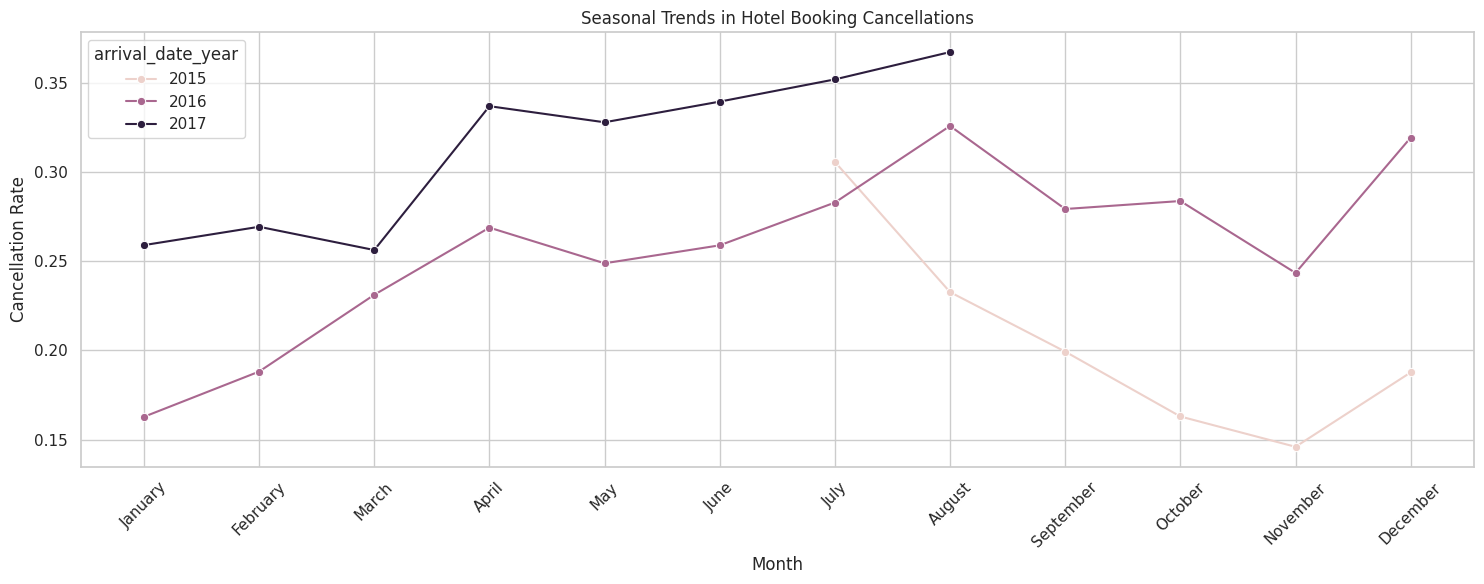

In [41]:
sns.set(style="whitegrid")

monthly_cancellation_rates = data.groupby(['arrival_date_year', 'arrival_date_month'])['is_canceled'].mean().reset_index()
months_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
monthly_cancellation_rates['arrival_date_month'] = pd.Categorical(monthly_cancellation_rates['arrival_date_month'], categories=months_order, ordered=True)
monthly_cancellation_rates.sort_values(by=['arrival_date_year', 'arrival_date_month'], inplace=True)

plt.figure(figsize=(15, 6))
sns.lineplot(x="arrival_date_month", y="is_canceled", hue="arrival_date_year", data=monthly_cancellation_rates, marker="o")
plt.title("Seasonal Trends in Hotel Booking Cancellations")
plt.xlabel("Month")
plt.ylabel("Cancellation Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

####Length of Stay

Didapatkan informasi: Semakin panjang durasi menginap (total_stays), semakin tinggi cancellation ratesnya (in general). Hal ini terjadi karena number of bookingsnya juga menurun seiring bertambahnya durasi menginap.

In [42]:
# Interactive length of stay plot
fig = px.histogram(data, x="total_stays", color="is_canceled",
                   nbins=70,  # Adjust the number of bins as needed
                   title="Total Stays Distribution by Cancellation Status",
                   labels={"total_stays": "Total Stays (Nights)",
                           "is_canceled": "Cancellation Status",
                           "count": "Number of Bookings"},
                   marginal="box",  # Add a box plot for marginal distribution
                   color_discrete_sequence=["green", "red"])  # Customize colors


fig.show()

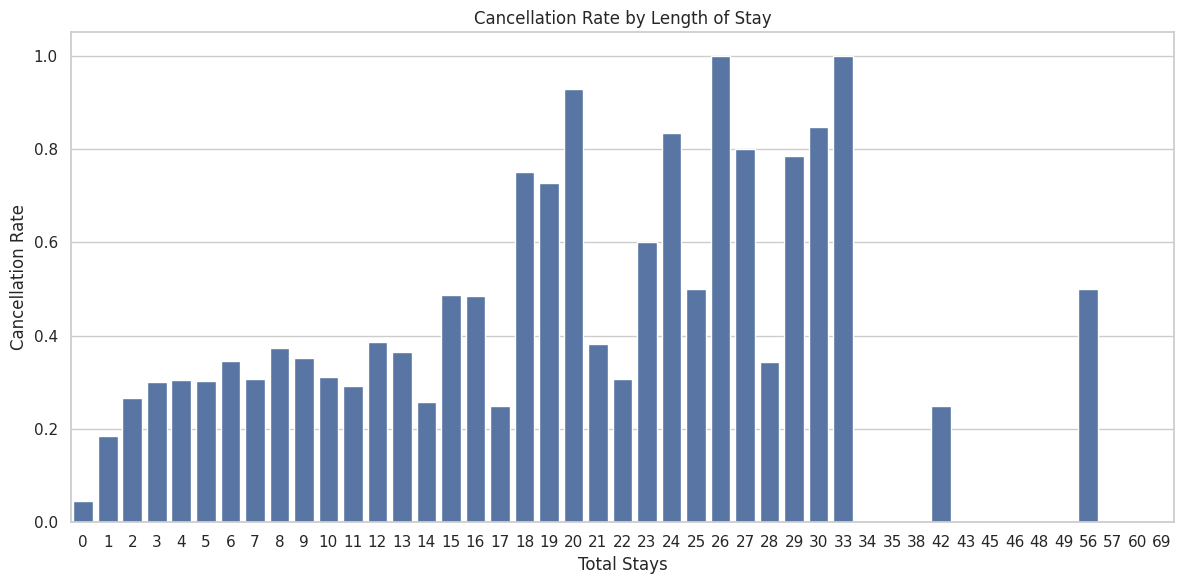

In [43]:
stay_length_cancellation_rates = data.groupby('total_stays')['is_canceled'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='total_stays', y='is_canceled', data=stay_length_cancellation_rates)
plt.title('Cancellation Rate by Length of Stay')
plt.xlabel('Total Stays')
plt.ylabel('Cancellation Rate')
plt.tight_layout()
plt.show()

####Meal Type

Didapatkan informasi:

1. Secara amount, Tamu dengan makanan BB (Bed & Breakfast) paling banyak cancellation
2. Secara rate, Tamu yang memesan makanan SC (Self Catering) memperlihatkan cancellation rates yang lebih tinggi. Sedangkan, Undefined memiliki cancellation rates terendah. BB, FB, HB memperlihatkan rate yang mirip.

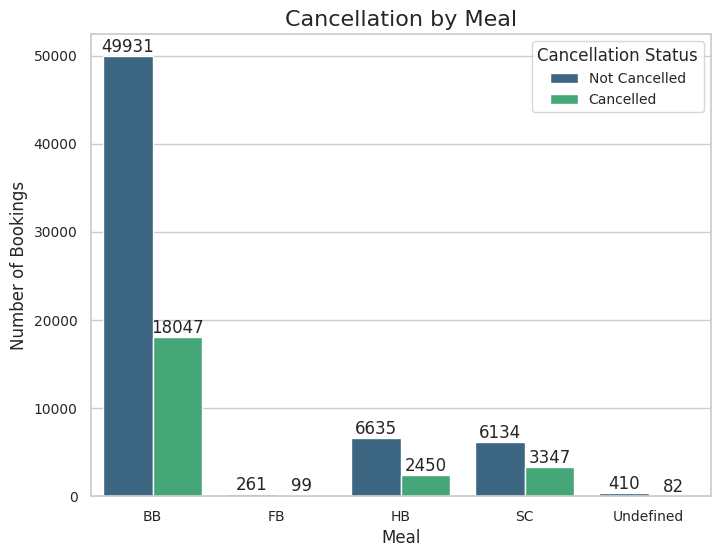

In [44]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='meal', hue='is_canceled', data=data, order=sorted(data['meal'].unique()), palette='viridis')
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
plt.title('Cancellation by Meal', fontsize=16)
plt.xlabel('Meal', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Cancellation Status', labels=['Not Cancelled', 'Cancelled'], fontsize=10)
plt.show()

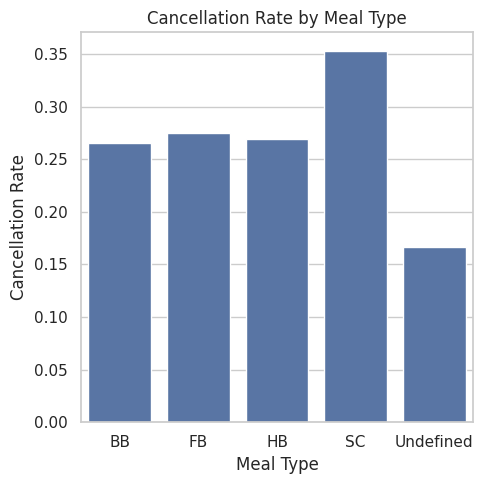

In [45]:
meal_cancellation_rates = data.groupby('meal')['is_canceled'].mean().reset_index()

plt.figure(figsize=(5, 5))
sns.barplot(x='meal', y='is_canceled', data=meal_cancellation_rates)
plt.title('Cancellation Rate by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Cancellation Rate')
plt.tight_layout()
plt.show()

####Countries

Didapatkan informasi:
1. Secara amount, Tamu dari 'PRT', 'GBR', dan 'FRA' paling banyak jumlah tamu cancel.
2. Secara rate, Tamu dari 'BRA', 'ITA', dan 'PRT' memiliki cancellation rates yang lebih tinggi daripada negara lainnya.
3. Negara-negara tetangga 'PRT' memiliki cancellation rate yang lebih rendah.

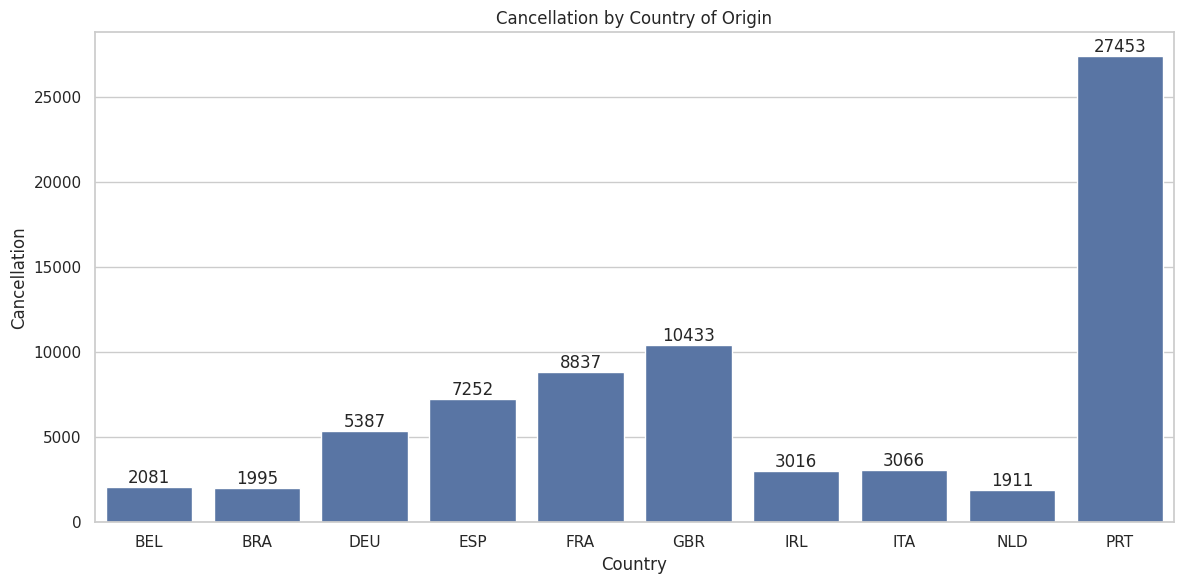

In [46]:
top_countries = data['country'].value_counts().nlargest(10).index
country_cancellation = data[data['country'].isin(top_countries)].groupby('country')['is_canceled'].count().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='country', y='is_canceled', data=country_cancellation)
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Cancellation by Country of Origin')
plt.xlabel('Country')
plt.ylabel('Cancellation')
plt.tight_layout()
plt.show()


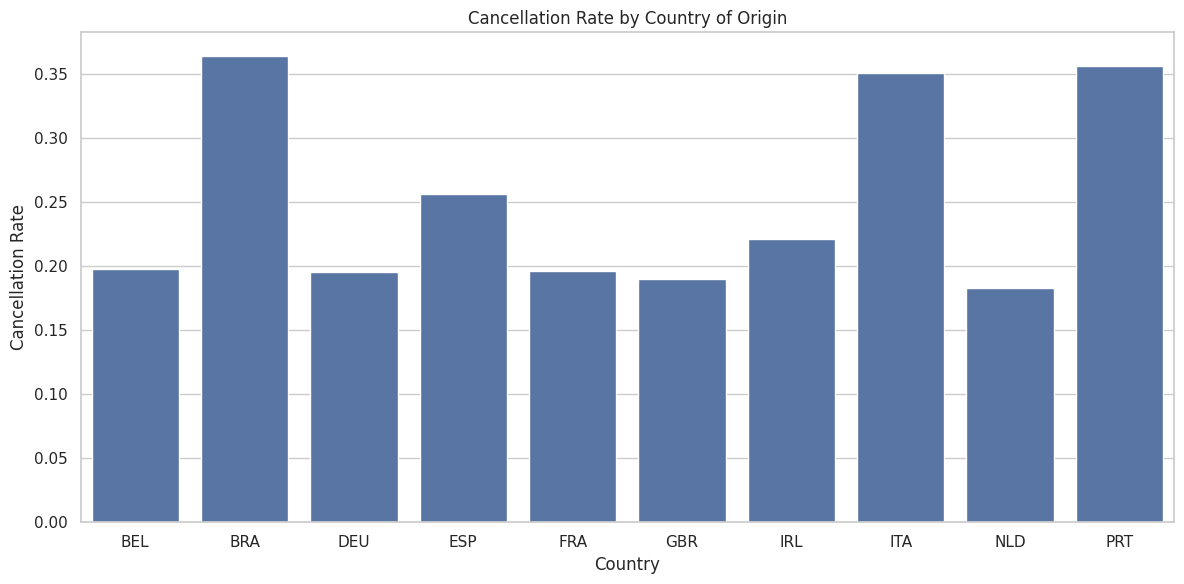

In [47]:
top_countries = data['country'].value_counts().nlargest(10).index
country_cancellation_rates = data[data['country'].isin(top_countries)].groupby('country')['is_canceled'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='is_canceled', data=country_cancellation_rates)
plt.title('Cancellation Rate by Country of Origin')
plt.xlabel('Country')
plt.ylabel('Cancellation Rate')
plt.tight_layout()
plt.show()

####Repeated Guests

Didapatkan informasi:


1. Lebih banyak tamu baru sebanyak 83,981 daripada repeated guests di 3,415.
  
   Booking tamu baru di City Hotel lebih banyak 51,720 daripada 32,261 di resort hotels.
  
   Bookings tamu repeated guests di kedua hotel mirip sekali, 1,708 untuk city hotels vs 1,707 resort hotels.
  
   Jumlah tamu baru 96.1% daripada repeat guests of 3.9%  

2. Tamu yang memesan ulang (Repeat guests) memiliki peluang yang lebih sedikit untuk cancel.
3.   Sebaliknya, tamu baru punya peluang cancel yang lebih tinggi.




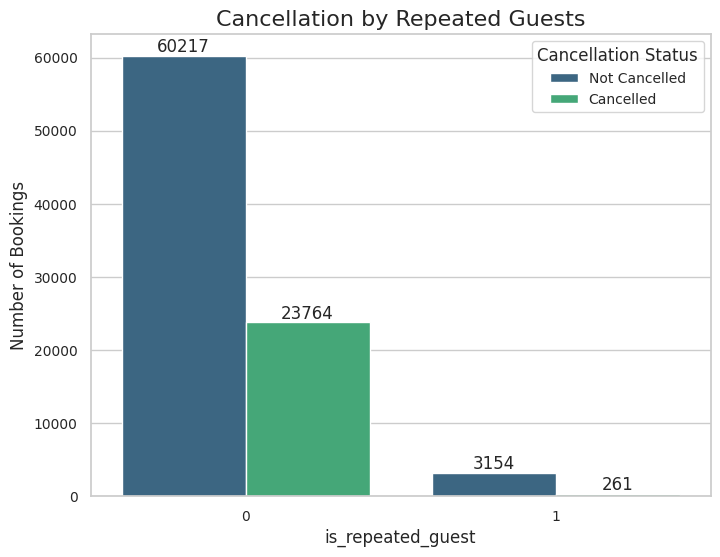

In [48]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='is_repeated_guest', hue='is_canceled', data=data, order=sorted(data['is_repeated_guest'].unique()), palette='viridis')
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
plt.title('Cancellation by Repeated Guests', fontsize=16)
plt.xlabel('is_repeated_guest', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Cancellation Status', labels=['Not Cancelled', 'Cancelled'], fontsize=10)
plt.show()

In [49]:
pd.crosstab(index=data['hotel'], columns=data['is_repeated_guest'], values=data['is_repeated_guest'], aggfunc=('count'), margins=True, margins_name='Total')

is_repeated_guest      0     1  Total
hotel                                
City Hotel         51720  1708  53428
Resort Hotel       32261  1707  33968
Total              83981  3415  87396

In [50]:
(pd.crosstab(index=data['hotel'], columns=data['is_repeated_guest'], values=data['is_repeated_guest'], aggfunc=('count'), normalize=True, margins=True, margins_name='Total')*100).round(2)

is_repeated_guest      0     1   Total
hotel                                 
City Hotel         59.18  1.95   61.13
Resort Hotel       36.91  1.95   38.87
Total              96.09  3.91  100.00

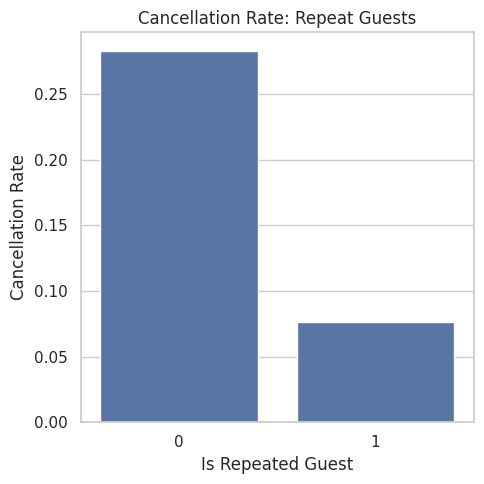

In [51]:
repeat_guest_cancellation_rates = data.groupby('is_repeated_guest')['is_canceled'].mean().reset_index()

plt.figure(figsize=(5, 5))
sns.barplot(x='is_repeated_guest', y='is_canceled', data=repeat_guest_cancellation_rates)
plt.title('Cancellation Rate: Repeat Guests')
plt.xlabel('Is Repeated Guest')
plt.ylabel('Cancellation Rate')
plt.tight_layout()
plt.show()

####Previous Cancellations

Didapatkan informasi:


1. Secara amount, Tamu yang belum pernah cancel paling banyak jumlah cancelnya.  
2. Secara rate, Tamu yang pernah cancel 1x
 memiliki peluang tinggi untuk cancel.
3. Jumlah data diatas 1x terlalu sedikit untuk mengambil kesimpulan.




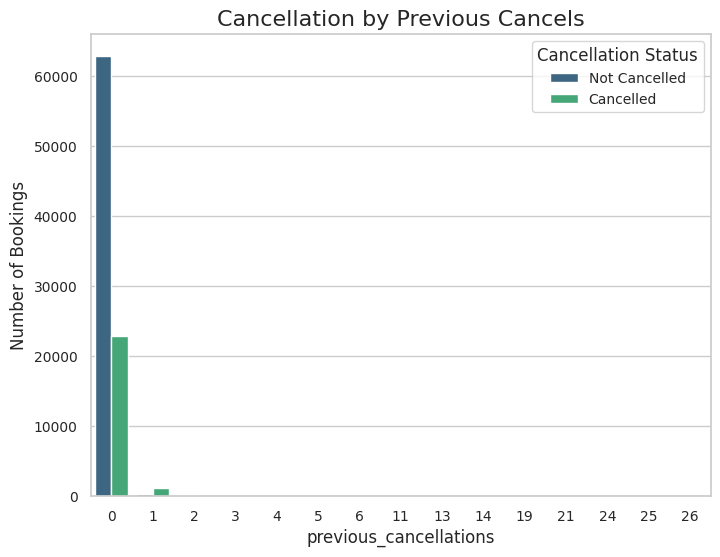

In [52]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='previous_cancellations', hue='is_canceled', data=data, order=sorted(data['previous_cancellations'].unique()), palette='viridis')
#ax.bar_label(ax.containers[0], label_type='edge')
#ax.bar_label(ax.containers[1], label_type='edge')
plt.title('Cancellation by Previous Cancels', fontsize=16)
plt.xlabel('previous_cancellations', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Cancellation Status', labels=['Not Cancelled', 'Cancelled'], fontsize=10)
plt.show()

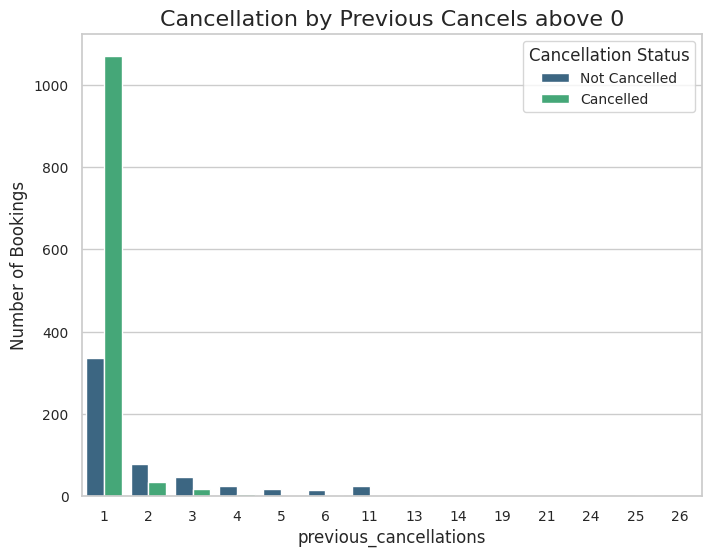

In [53]:
previous_cancellations_above0 = data[data['previous_cancellations'] > 0]

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='previous_cancellations', hue='is_canceled', data=previous_cancellations_above0 , order=sorted(previous_cancellations_above0 ['previous_cancellations'].unique()), palette='viridis')
#ax.bar_label(ax.containers[0], label_type='edge')
#ax.bar_label(ax.containers[1], label_type='edge')
plt.title('Cancellation by Previous Cancels above 0', fontsize=16)
plt.xlabel('previous_cancellations', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Cancellation Status', labels=['Not Cancelled', 'Cancelled'], fontsize=10)
plt.show()

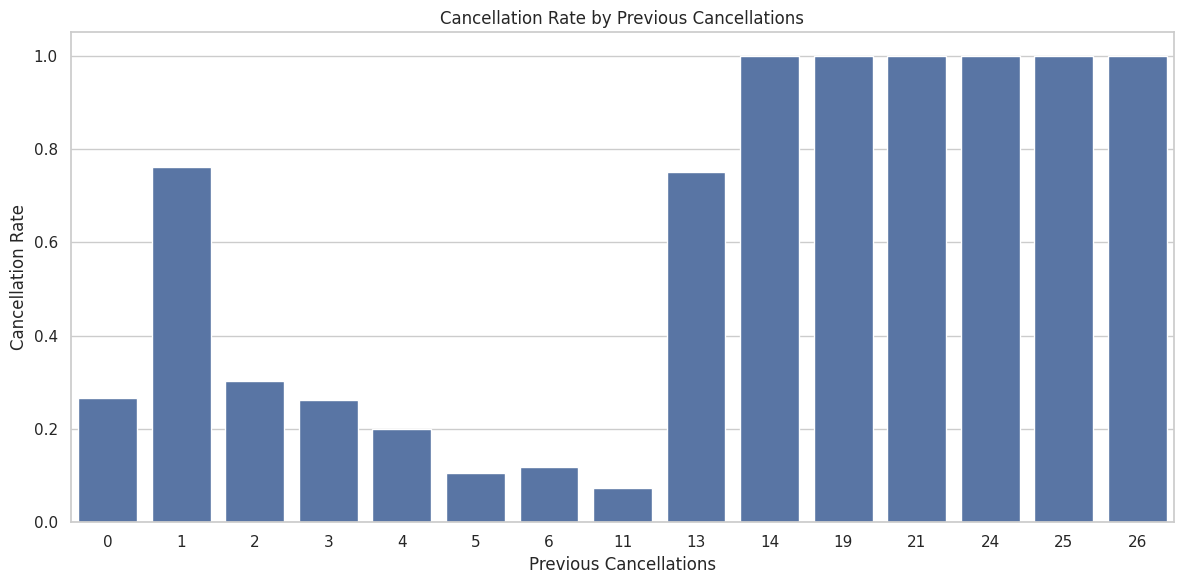

In [54]:
previous_cancellations_cancellation_rates = data.groupby('previous_cancellations')['is_canceled'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='previous_cancellations', y='is_canceled', data=previous_cancellations_cancellation_rates)
plt.title('Cancellation Rate by Previous Cancellations')
plt.xlabel('Previous Cancellations')
plt.ylabel('Cancellation Rate')
plt.tight_layout()
plt.show()

####Room Type Match

Didapatkan informasi: Perbedaan antara kamar yang dipesan dan kamar yang diterima tamu tidak memengaruhi cancellation rates.




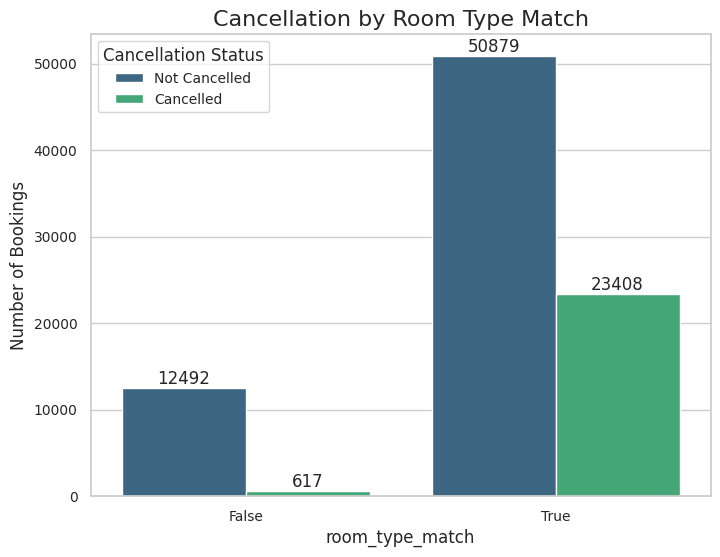

In [55]:
data['room_type_match'] = data['reserved_room_type'] == data['assigned_room_type']
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='room_type_match', hue='is_canceled', data=data , order=sorted(data ['room_type_match'].unique()), palette='viridis')
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
plt.title('Cancellation by Room Type Match', fontsize=16)
plt.xlabel('room_type_match', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Cancellation Status', labels=['Not Cancelled', 'Cancelled'], fontsize=10)
plt.show()

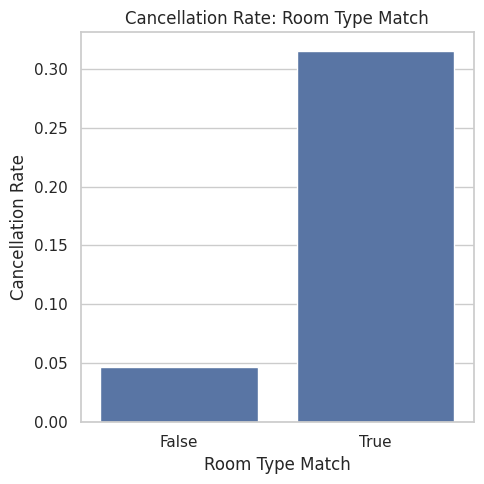

In [56]:
data['room_type_match'] = data['reserved_room_type'] == data['assigned_room_type']
room_type_cancellation_rates = data.groupby('room_type_match')['is_canceled'].mean().reset_index()

plt.figure(figsize=(5, 5))
sns.barplot(x='room_type_match', y='is_canceled', data=room_type_cancellation_rates)
plt.title('Cancellation Rate: Room Type Match')
plt.xlabel('Room Type Match')
plt.ylabel('Cancellation Rate')
plt.tight_layout()
plt.show()

####Booking Changes

Didapatkan informasi: Booking changes tidak terlihat berkorelasi dengan cancellation rates.




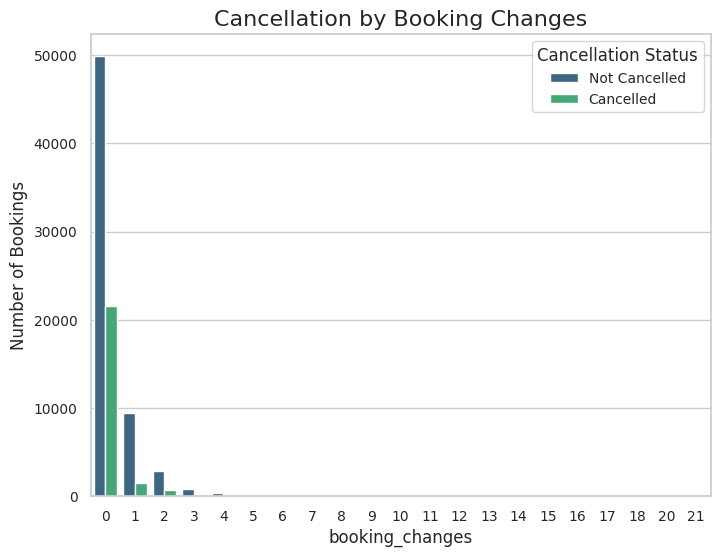

In [57]:

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='booking_changes', hue='is_canceled', data=data , order=sorted(data ['booking_changes'].unique()), palette='viridis')
#ax.bar_label(ax.containers[0], label_type='edge')
#ax.bar_label(ax.containers[1], label_type='edge')
plt.title('Cancellation by Booking Changes', fontsize=16)
plt.xlabel('booking_changes', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Cancellation Status', labels=['Not Cancelled', 'Cancelled'], fontsize=10)
plt.show()

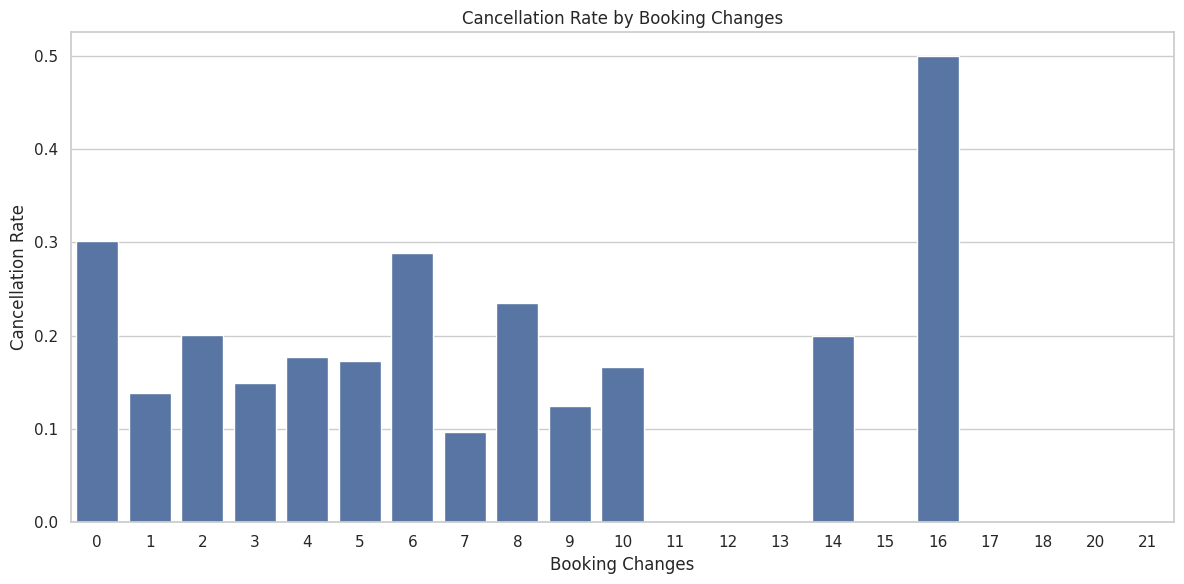

In [58]:
booking_changes_cancellation_rates = data.groupby('booking_changes')['is_canceled'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='booking_changes', y='is_canceled', data=booking_changes_cancellation_rates)
plt.title('Cancellation Rate by Booking Changes')
plt.xlabel('Booking Changes')
plt.ylabel('Cancellation Rate')
plt.tight_layout()
plt.show()

####Waiting List

Didapatkan informasi: Tidak terlihat hubungan korelasi antara lama seorang tamu dalam waiting list dan cancellation rates.


In [59]:
# Interactive waiting list plot
fig = px.histogram(data, x="days_in_waiting_list", color="is_canceled",
                   nbins=100,  # Adjust the number of bins as needed
                   title="Days in Waiting List by Cancellation Status",
                   labels={"days_in_waiting_list": "Days in Waiting List",
                           "is_canceled": "Cancellation Status",
                           "count": "Number of Bookings"},
                   marginal="box",  # Add a box plot for marginal distribution
                   color_discrete_sequence=["green", "red"])  # Customize colors


fig.show()

In [60]:
days_in_waiting_above0 = data[data['days_in_waiting_list'] > 0]

# Interactive waiting list plot
fig = px.histogram(days_in_waiting_above0, x="days_in_waiting_list", color="is_canceled",
                   nbins=500,  # Adjust the number of bins as needed
                   title="Days in Waiting List Above 0 by Cancellation Status",
                   labels={"days_in_waiting_list": "Days in Waiting List",
                           "is_canceled": "Cancellation Status",
                           "count": "Number of Bookings"},
                   marginal="box",  # Add a box plot for marginal distribution
                   color_discrete_sequence=["green", "red"])  # Customize colors


fig.show()

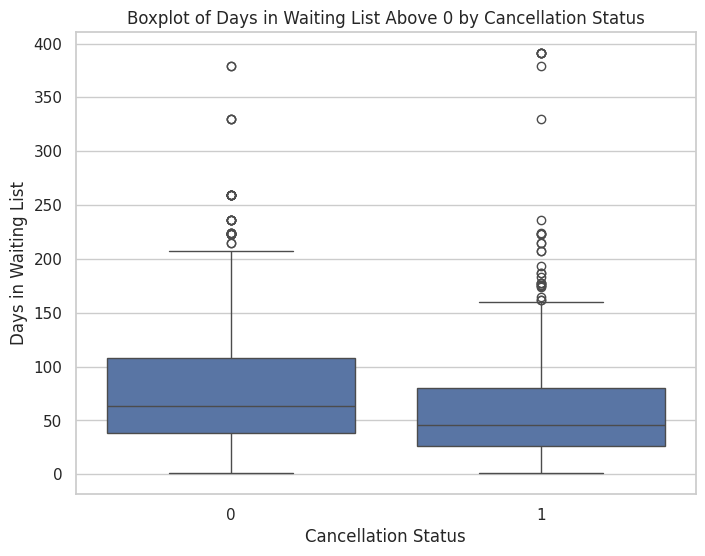

In [61]:
#Boxplot for days waiting list by cancellation status

plt.figure(figsize=(8, 6))
sns.boxplot(x='is_canceled', y='days_in_waiting_list', data=days_in_waiting_above0)
plt.title('Boxplot of Days in Waiting List Above 0 by Cancellation Status')
plt.xlabel('Cancellation Status')
plt.ylabel('Days in Waiting List')
plt.show()

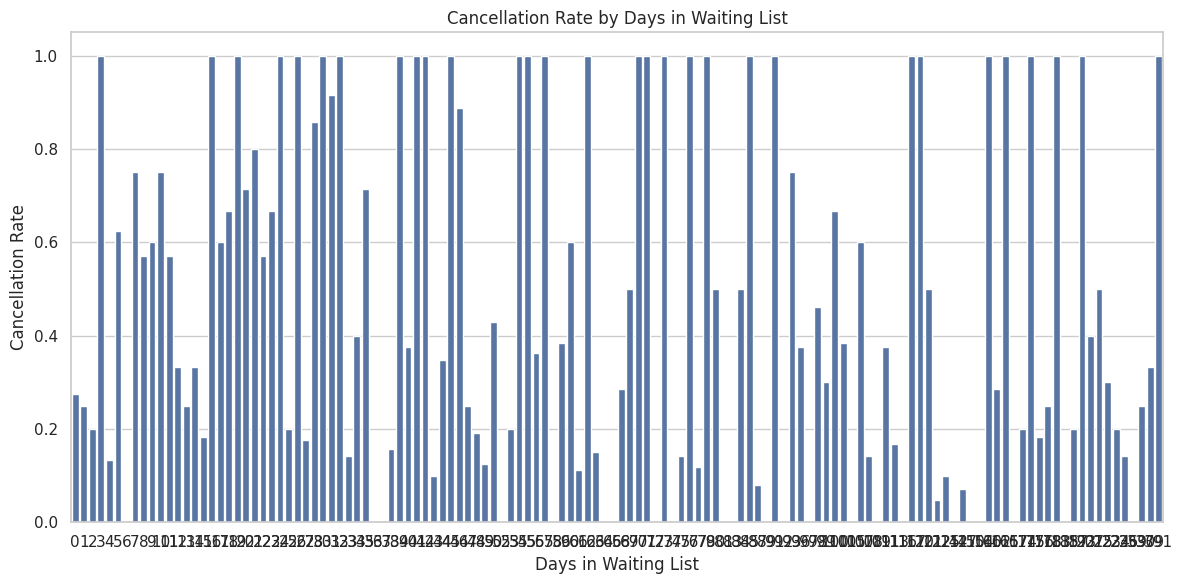

In [62]:
waiting_list_cancellation_rates = data.groupby('days_in_waiting_list')['is_canceled'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='days_in_waiting_list', y='is_canceled', data=waiting_list_cancellation_rates)
plt.title('Cancellation Rate by Days in Waiting List')
plt.xlabel('Days in Waiting List')
plt.ylabel('Cancellation Rate')
plt.tight_layout()
plt.show()

####Customer Type

Didapatkan informasi: Tamu 'Transient' (bukan bagian dari sebuah group atau contract) cenderung memiliki peluang cancel lebih tinggi.



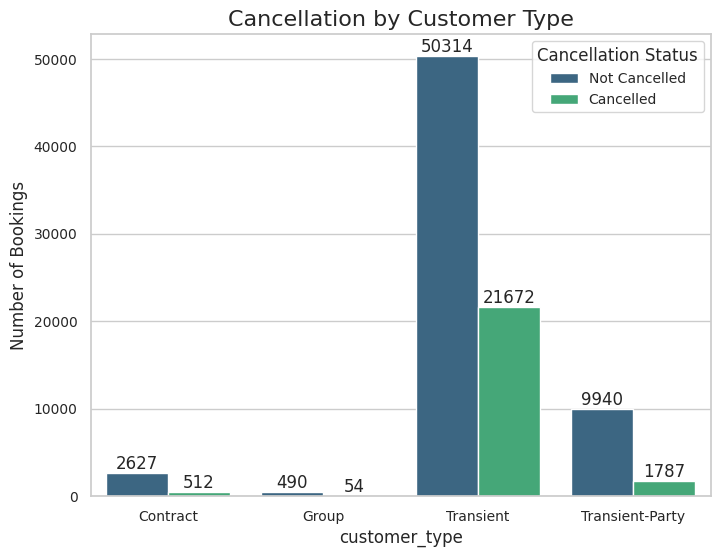

In [63]:

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='customer_type', hue='is_canceled', data=data , order=sorted(data ['customer_type'].unique()), palette='viridis')
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
plt.title('Cancellation by Customer Type', fontsize=16)
plt.xlabel('customer_type', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Cancellation Status', labels=['Not Cancelled', 'Cancelled'], fontsize=10)
plt.show()

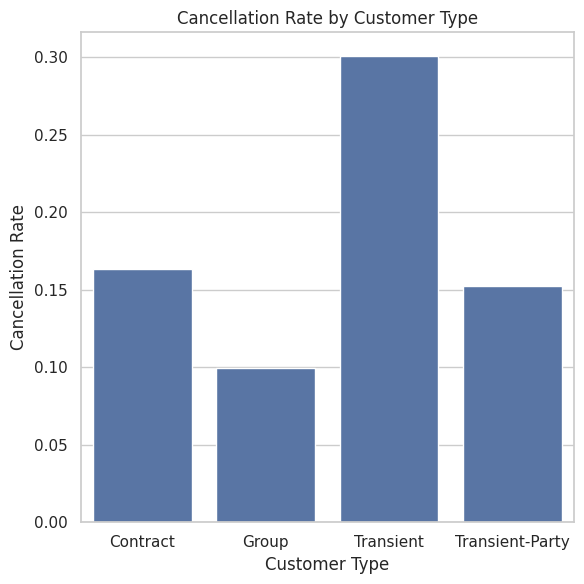

In [64]:
customer_type_cancellation_rates = data.groupby('customer_type')['is_canceled'].mean().reset_index()

plt.figure(figsize=(6, 6))
sns.barplot(x='customer_type', y='is_canceled', data=customer_type_cancellation_rates)
plt.title('Cancellation Rate by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Cancellation Rate')
plt.tight_layout()
plt.show()

####Average Daily Rate (ADR)

Didapatkan informasi:
1. Secara amount tamu dengan ADR 50-150 paling banyak cancel
2. Secara rate, Semakin tinggi ADR, peluang cancel cenderung menjadi lebih tinggi.



In [65]:
# Interactive ADR plot
fig = px.histogram(data, x="adr", color="is_canceled",
                   nbins=100,  # Adjust the number of bins as needed
                   title="ADR by Cancellation Status",
                   labels={"adr": "ADR",
                           "is_canceled": "Cancellation Status",
                           "count": "Number of Bookings"},
                   marginal="box",  # Add a box plot for marginal distribution
                   color_discrete_sequence=["green", "red"])  # Customize colors


fig.show()

In [66]:
ADR_below1000 = data[data['adr'] < 1000]
# Interactive ADR plot
fig = px.histogram(ADR_below1000, x="adr", color="is_canceled",
                   nbins=100,  # Adjust the number of bins as needed
                   title="ADR Below 1000 by Cancellation Status",
                   labels={"adr": "ADR",
                           "is_canceled": "Cancellation Status",
                           "count": "Number of Bookings"},
                   marginal="box",  # Add a box plot for marginal distribution
                   color_discrete_sequence=["green", "red"])  # Customize colors


fig.show()

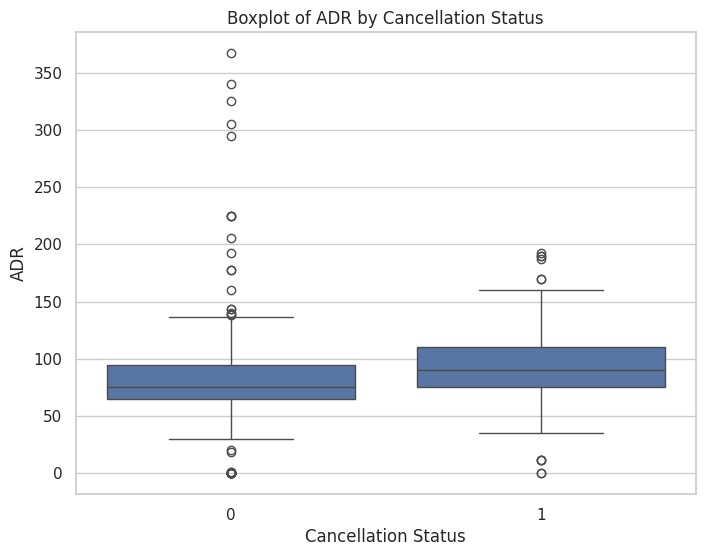

In [67]:
#Boxplot for ADR by cancellation status

plt.figure(figsize=(8, 6))
sns.boxplot(x='is_canceled', y='adr', data=days_in_waiting_above0)
plt.title('Boxplot of ADR by Cancellation Status')
plt.xlabel('Cancellation Status')
plt.ylabel('ADR')
plt.show()

<ipython-input-68-26fbf5b84b9a>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



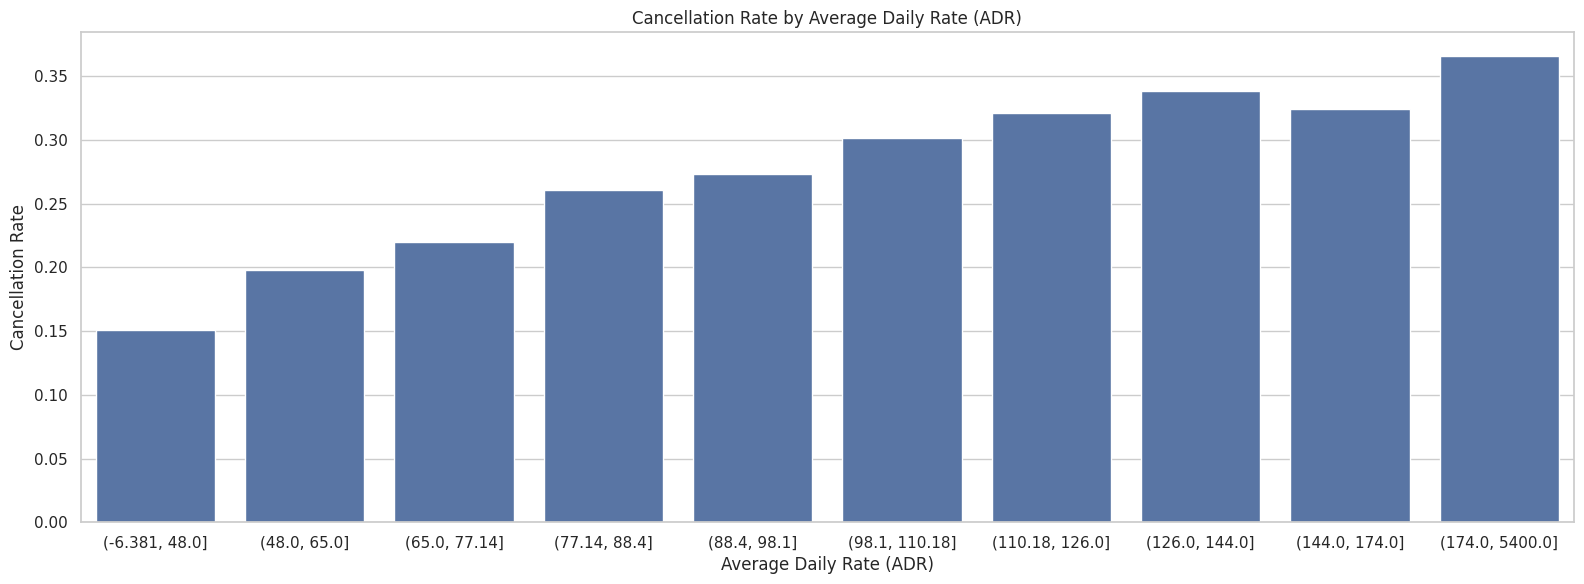

In [68]:
data['adr_bin'] = pd.qcut(data['adr'], q=10)  # percentile binning of ADR
adr_cancellation_rates = data.groupby('adr_bin')['is_canceled'].mean().reset_index()

plt.figure(figsize=(16, 6))
sns.barplot(x='adr_bin', y='is_canceled', data=adr_cancellation_rates)
plt.title('Cancellation Rate by Average Daily Rate (ADR)')
plt.xlabel('Average Daily Rate (ADR)')
plt.ylabel('Cancellation Rate')
plt.tight_layout()
plt.show()

####Special Requests

Didapatkan informasi:

1. Secara amount, tamu tanpa special requests paling banyak cancel amountnya.
2. Secara rate, Semakin banyak Special Requests seorang tamu, semakin rendah cancellation ratesnya.



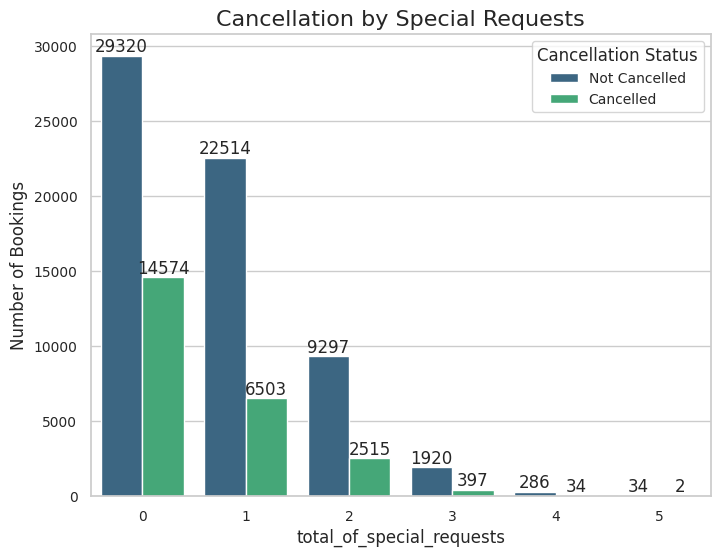

In [69]:

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='total_of_special_requests', hue='is_canceled', data=data , order=sorted(data ['total_of_special_requests'].unique()), palette='viridis')
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
plt.title('Cancellation by Special Requests', fontsize=16)
plt.xlabel('total_of_special_requests', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Cancellation Status', labels=['Not Cancelled', 'Cancelled'], fontsize=10)
plt.show()

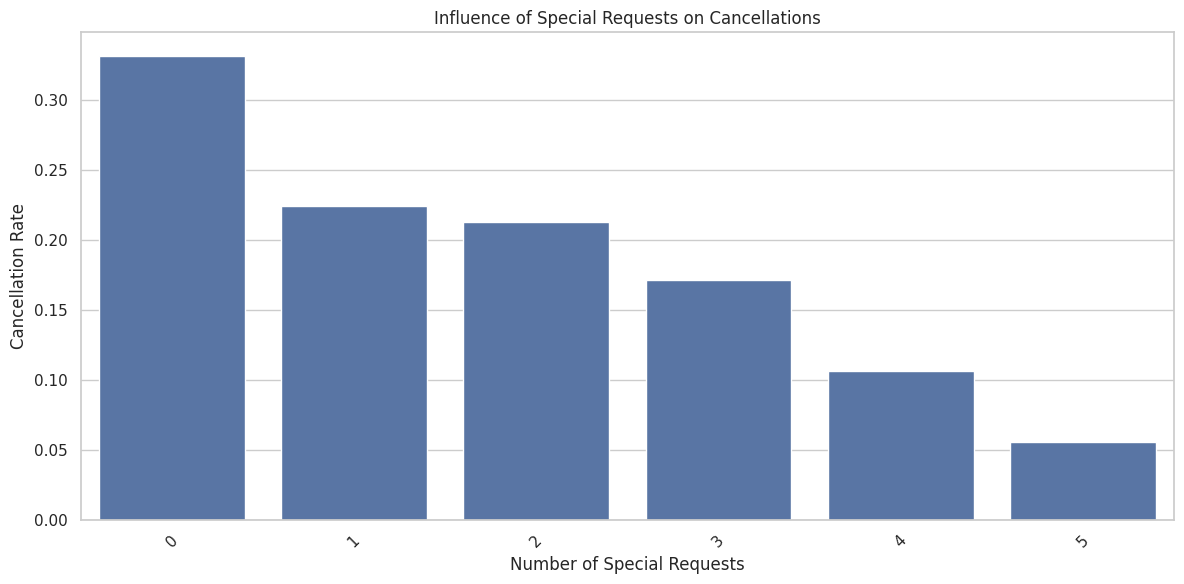

In [70]:
special_requests_cancellation_rates = data.groupby('total_of_special_requests')['is_canceled'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='total_of_special_requests', y='is_canceled', data=special_requests_cancellation_rates)
plt.title("Influence of Special Requests on Cancellations")
plt.xlabel("Number of Special Requests")
plt.ylabel("Cancellation Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3.2 Analysis and Recommendations

####Analysis and Recommendations

- Secara umum
1. Tamu umumnya menginap di hotel antara 1-4 hari. Hal ini sesuai dengan riset [Statista Portugal](https://www.statista.com/statistics/1058676/average-number-nights-tourists-accommodation-portugal-regions/), [BPS Indonesia](https://www.bps.go.id/en/statistics-table/2/MzYyIzI=/average-length-of-stay-in-classified-hotel-by-province--day-.html), dan [Hotel Nuggets USA](https://www.hotelnuggets.com/blog/average-length-of-stay). Sepertinya pattern ini sama di semua negara (ingat dataset kita adalah hotel di Portugal).
2. Terdapat trend seasonal dimana jumlah tamu naik pada musim semi hingga musim gugur (Maret - Oktober). Menurut [Travel and Leisure](https://www.travelandleisure.com/best-time-to-visit-portugal-8387445), ketiga musim ini merupakan waktu yang baik untuk travel ke Portugal karena hari-hari hangat dan panjang.

 Menurut [hospitalitynet](https://www.hospitalitynet.org/opinion/4104108.html), masa post-COVID 19 memberikan kesempatan bagi hotel untuk berinovasi agar dapat meningkatkan penjualan. Musim panas merupakan waktu yang baik bagi hotel untuk menawarkan paket liburan yang berhubungan dengan kegiatan luar ruangan dan menggaet tempat-tempat atraksi bagi turis. Hotel juga dapat mempromosikan kegiatan liburan musim panas melalui sosial media mereka.

 Menurut [audleytravel](https://www.audleytravel.com/us/portugal/best-time-to-visit), musim semi dan musim gugur juga merupakan waktu yang baik untuk mengunjungi Portugal. Hal ini karena musim anggur, pantai yang lebih sunyi, dan festival-festival yang berlangsung setiap waktu di Portugal. Sama seperti musim panas, hotel perlu menawarkan liburan kegiatan luar ruangan dan mempromosikan hal ini dalam sosial media (apalagi cuacanya tidak sepanas musim panas).

3. Trend jumlah tamu menaik dari tahun ke tahun. Hal ini memberikan insight potensi ekspansi jumlah kamar untuk mengakomodir kenaikan jumlah tamu.

4. Online TA mendominasi sebagai metode pemesanan oleh tamu hotel (59% dari seluruh pesanan). [Studi](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3595709) menunjukkan bahwa di zaman sekarang, Online TA merupakan metode pemesanan yang paling dominan. Hotel perlu memberikan fokus pada promosi dan pemasaran melalui Online TA untuk menjangkau pasar seluas-luasnya, menjadi pilihan yang 'menonjol' saat dicari oleh nasabah Online TA.

- Tentang Cancellations
1. Fitur yang berkorelasi positif (atau negatif jika dituliskan) dengan cancellation:
  1. Children & Babies: -
  2. Hotel type: City hotel
  3. Market Segment & Dist. Channels: Online TA dan TA/TO, Groups
  4. Deposit Type: No Deposit
  5. Lead Time: korelasi positif
  6. Seasonal: -
  7. Length of Stay: korelasi positif
  8. Meal Type: -
  9. Countries: PRT
  10. Repeated Guests: tamu baru
  11. Previous Cancellations: pernah cancel
  12. Room Type Match: -
  13. Booking Changes: -
  14. Waiting List: -
  15. Customer Type: Transient
  16. ADR: korelasi positif
  17. Special Requests: korelasi negatif

2. Tamu 'City Hotel' lebih banyak dengan pembatalan juga banyak daripada 'Resort Hotel'. Hal ini bisa terjadi karena Tamu City Hotel bisa memiliki urusan bisnis (rencana bisnis bisa berubah secara mendadak), dan cenderung mengundang tamu yang suka mencari diskon (pesan dan ganti hotel seiring adanya diskon). Resort Hotel lebih ditujukan untuk Tamu yang ingin berlibur. Mereka cenderung tidak membatalkan karena seringkali sudah merencanakan penginapan jauh-jauh hari (namun tetap bisa batal karena force majeoure).

 **Rekomendasi:** Bagi 'City Hotel', perlu adanya kebijakan pembatalan yang fleksibel dan menguntungkan hotel (misalnya wajib deposit dan pemotongan deposit jika batal), serta menganalisis penyebab pembatalan agar dapat memberikan insentif bagi Tamu supaya tidak membatalkan booking hotel mereka. Fasilitas yang dibutuhkan pebisnis dapat dikembangkan untuk nilai tambah (seperti WiFi cepat dan quiet room)

 **Rekomendasi:** Bagi 'Resort Hotel', jumlah Tamu dapat lebih ditingkatkan. Misalnya dengan cara berkampanye dan promosi hotel pada waktu-waktu liburan dengan membuat aktivitas ramah keluarga, bekerja sama dengan badan turisme setempat dalam membuat paket wisata yang menarik, dan memberikan program loyalitas kepada Tamu yang setia.

3. Tamu 'Online TA' dan 'Groups' rentan untuk batal booking. Ini umum terjadi pada tamu ketika mereka memesan beberapa akomodasi dan membatalkan pesanan ketika ada perubahan rencana atau penawaran yang lebih baik. Ini juga rentan pada grup karena perubahan rencana satu orang saja dapat menyebabkan pembatalan seluruh pemesanan group.

  **Rekomendasi:** Mengingat Tamu 'TA/TO' (terutama yang Online) dan 'Groups' cukup banyak jumlahnya dan pembatalannya, hotel perlu mempertimbangkan kebijakan pembatalan  yang lebih ketat untuk mengurangi tingkat pembatalan ini, ataupun memberikan program loyalitas kepada Tamu yang setia. Dapat dipikirkan juga kebijakan reschedule.

4. Tamu 'No Deposit' paling banyak (98% dari seluruh tamu) dan cukup sering melakukan pembatalan. Ditambah, uji Chi-Square Test of Independence menunjukkan bahwa Deposit Type dan Cancellation saling terhubung. Hal ini cukup logis karena orang yang tidak memberikan deposit akan merasa mudah untuk membatalkan pesanan hotelnya.

 **Rekomendasi:** Menurut [cvent](https://www.cvent.com/en/blog/hospitality/how-to-increase-hotel-revenue), hotel dapat meningkatkan  pendapatan mereka dengan menciptakan kebijakan tentang pembatalan pemesanan kamar, seperti mewajibkan deposit, memberikan tenggat waktu pembatalan, dan promosi yang menarik. Hotel dapat menerapkan diskon jika pelanggan melakukan reservasi dengan deposit (baik 'refundable' ataupun 'non-refundable'). Selain itu, hotel juga dapat memberikan kebijakan tenggat waktu pembatalan yang ketat untuk pemesanan dengan tipe 'no deposit' (atau harga yang lebih mahal).

5. Sebagian besar pembatalan hotel terjadi pada Lead Time pendek (karena banyak tamu dengan Lead Time pendek), tetapi persentase pembatalan semakin naik seiring bertambah panjangnya lead time. Hal ini menunjukkan bahwa tamu yang memesan lebih awal cenderung suka cancel.

 **Rekomendasi:** Memberikan fasilitas reschedule dapat dipertimbangkan apabila sebab pembatalan ialah perubahan rencana yang mendadak (tentunya lebih baik jika diterapkan untuk Tamu yang membayar deposit). Fasilitas ini kiranya dapat membantu tamu dengan Lead Time yang panjang dan pendek. Tidak lupa pula untuk mengingatkan para Tamu terhadap pesanan yang telah mereka booking, agar tidak cancel.

6. Cancellation cenderung menaik seiring bertambah panjangnya Length of Stay.

 **Rekomendasi:** Memberikan promosi ataupun diskon dapat dilakukan, apabila hotel ingin mendapatkan lebih banyak Tamu dengan Length of Stay yang panjang.

7. Tamu dari 'PRT' (lokal) menunjukkan jumlah booking dan pembatalan paling tinggi. Beberapa negara tetangga dengan jumlah booking yang lebih rendah memperlihatkan cancellation rate yang lebih mending.

 **Rekomendasi:** Memberikan promosi khusus untuk orang lokal dapat dipertimbangkan untuk mendapatkan pelanggan lokal yang loyal dimasa depan. Selain itu, dapat dipertimbangkan bagi hotel untuk membuat strategi penarikan turis-turis dari luar negeri (di negara yang cancellation ratenya lebih rendah).

8. Tamu yang memesan ulang (Repeated guests) memiliki peluang yang lebih sedikit untuk cancel, walaupun jumlah orangnya sedikit. Sebaliknya, tamu baru punya peluang cancel yang lebih tinggi.

 **Rekomendasi:** Memberikan promosi khusus untuk Repeated guests perlu dipertimbangkan untuk menambah dan meningkatkan loyalitas pelanggan. Peningkatan fasilitas yang diperlukan oleh Repeated guests juga perlu dipikirkan oleh pihak hotel.

9. Tamu dengan 'Previous Cancellations' setidaknya satu menunjukkan tingkat pembatalan yang relatif lebih tinggi (walaupun jumlah Tamu dengan pembatalan diatas satu terlalu sedikit untuk menyimpulkan). Ini menunjukkan pola pembatalan berulang, yang menunjukkan bahwa perilaku masa lalu adalah indikator kuat untuk pembatalan di masa depan.

 **Rekomendasi:**Analisis lebih lanjut dengan binning antara 0 dan 1 untuk data ini

10. Tamu 'Transient' memiliki cancellation rate tertinggi. Ini menunjukkan bahwa mereka cenderung melakukan perubahan rencana atau membuat pemesanan yang spekulatif. Hal ini wajar

11. Semakin tinggi ADR, peluang cancel cenderung menjadi lebih tinggi. Hal ini adalah wajar jika kita mengasumsikan Tamu sebagai orang yang rasional dan mementingkan harga dalam memesan hotel.

 **Rekomendasi:** Analisis lebih lanjut, terutama analisis seasonal untuk membuat keputusan dalam strategi promosi hotel.

12. Semakin banyak Special Requests seorang tamu, semakin rendah cancellation ratesnya. Hal ini menandakan bahwa semakin hotel dapat mengakomodasi kebutuhan Tamu, maka Tamu akan cenderung lebih loyal dan tidak membatalkan pesanan. Selain itu, Tamu dengan Special Requests bisa juga cenderung berlangganan dan familiar dengan hotel kita.

 **Rekomendasi:** Business as Usual dan memenuhi permintaan khusus yang diminta oleh para Tamu sebisa kita, tentunya dengan mempertimbangkan cost and benefitnya.


In [71]:
data.to_csv('hotel_bookings_clean.csv', encoding='utf-8', index=True)

In [72]:
data.to_excel('hotel_bookings_clean.xlsx')

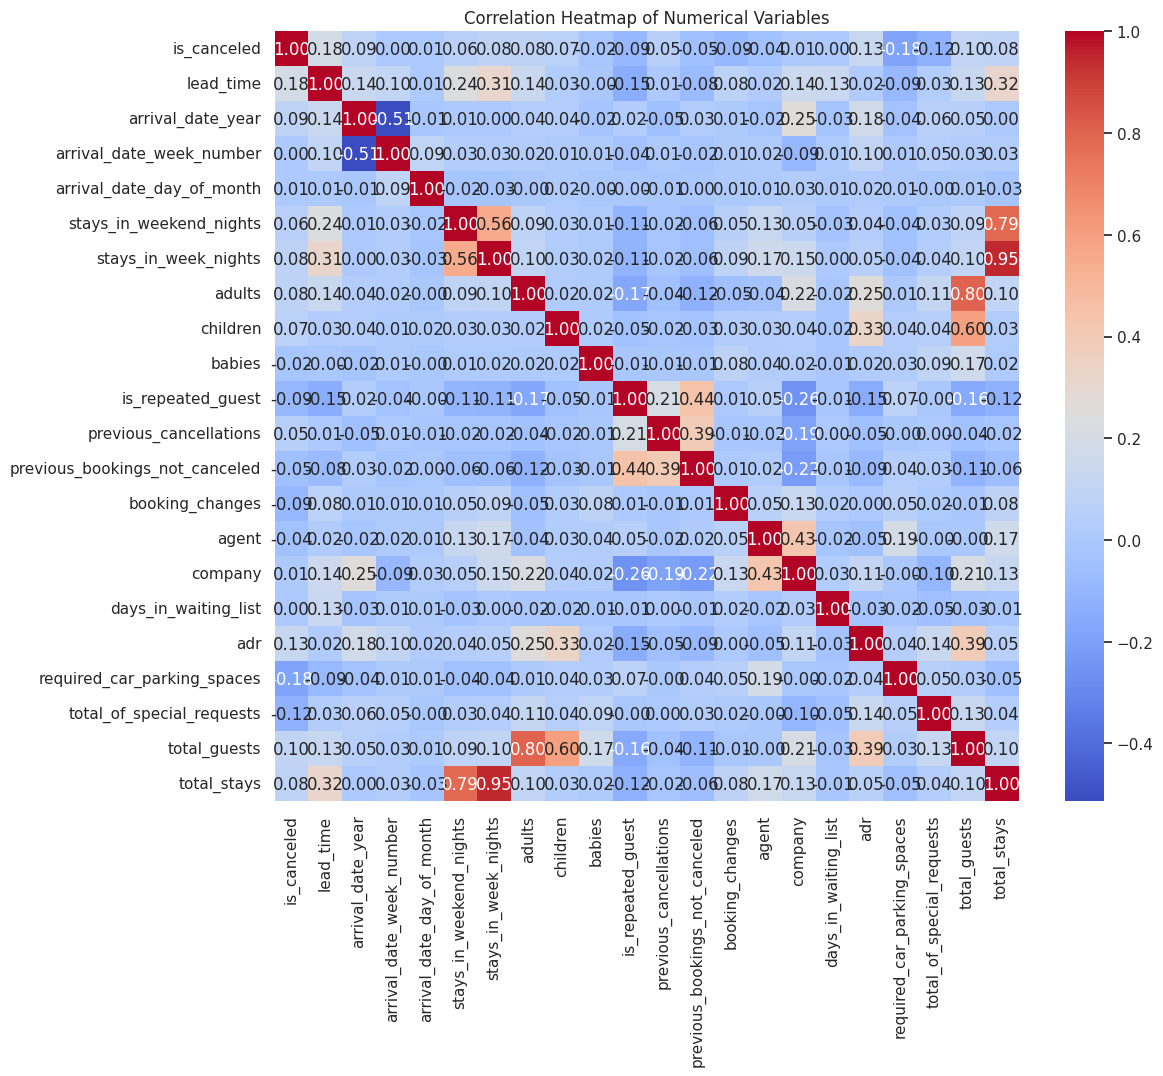

In [73]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 10))
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

## 4. Modelling

### 4.1 Variable Drop & Data Splitting

In [80]:
features_to_drop = [
    'previous_cancellations',  # Sangat berkorelasi dengan target
    'total_of_special_requests',  # Korelasi tinggi dengan target
    'reservation_status',  # Bisa langsung mencerminkan target
    'reservation_status_date',  # Tanggal ini mungkin mencerminkan status pembatalan
    'total_guests',  # Redundan dengan adults, children, babies
    'total_stays'  # Redundan dengan stays_in_week_nights dan stays_in_weekend_nights
]


data_cleaned = data.drop(columns=features_to_drop, errors='ignore')

In [84]:
from sklearn.model_selection import train_test_split


X = data_cleaned.drop(columns='is_canceled')
y = data_cleaned['is_canceled']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


print("Ukuran Training Set (X_train, y_train):", X_train.shape, y_train.shape)
print("Ukuran Test Set (X_test, y_test):", X_test.shape, y_test.shape)
print("\nDistribusi target pada training set:")
print(y_train.value_counts(normalize=True))
print("\nDistribusi target pada test set:")
print(y_test.value_counts(normalize=True))

Ukuran Training Set (X_train, y_train): (69916, 34) (69916,)
Ukuran Test Set (X_test, y_test): (17480, 34) (17480,)

Distribusi target pada training set:
is_canceled
0    0.725099
1    0.274901
Name: proportion, dtype: float64

Distribusi target pada test set:
is_canceled
0    0.725114
1    0.274886
Name: proportion, dtype: float64


### 4.2 Data Preprocessing

In [85]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Identifikasi kolom numerik dan kategorikal
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', RobustScaler())
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ]), categorical_features)
    ]
)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

ohe_columns = preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(categorical_features)
all_columns = numerical_features + ohe_columns.tolist()

X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=all_columns, index=X_train.index)
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=all_columns, index=X_test.index)

print("Data setelah preprocessing (Training):")
print(X_train_preprocessed_df.head())
print("\nData setelah preprocessing (Test):")
print(X_test_preprocessed_df.head())


Data setelah preprocessing (Training):
       lead_time  arrival_date_year  arrival_date_week_number  \
67198  -0.236842                1.0                 -0.476190   
93067   0.543860                0.0                  0.095238   
70256   3.271930                1.0                 -0.142857   
31920  -0.429825                1.0                 -1.190476   
21747  -0.377193                0.0                 -0.809524   

       arrival_date_day_of_month  stays_in_weekend_nights  \
67198                     0.8125                      0.5   
93067                    -0.1875                     -0.5   
70256                    -0.1875                     -0.5   
31920                    -0.3125                     -0.5   
21747                    -0.8125                      0.5   

       stays_in_week_nights  adults  children  babies  is_repeated_guest  ...  \
67198             -0.333333     0.0       0.0     0.0                0.0  ...   
93067              0.333333     0.0      

### 4.3 Benchmarking

#### Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_preprocessed_df, y_train)

y_pred_log_reg = log_reg.predict(X_test_preprocessed_df)
y_pred_proba_log_reg = log_reg.predict_proba(X_test_preprocessed_df)[:, 1]

print("Logistic Regression")
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:", classification_report(y_test, y_pred_log_reg))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_log_reg))


Logistic Regression
Confusion Matrix: [[11544  1131]
 [ 2803  2002]]
Classification Report:               precision    recall  f1-score   support

           0       0.80      0.91      0.85     12675
           1       0.64      0.42      0.50      4805

    accuracy                           0.77     17480
   macro avg       0.72      0.66      0.68     17480
weighted avg       0.76      0.77      0.76     17480

ROC-AUC Score: 0.8203412126175273


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



#### Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_preprocessed_df, y_train)

y_pred_rf = rf_model.predict(X_test_preprocessed_df)
y_pred_proba_rf = rf_model.predict_proba(X_test_preprocessed_df)[:, 1]

print("\nRandom Forest")
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_rf))



Random Forest
Confusion Matrix: [[11510  1165]
 [ 2013  2792]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88     12675
           1       0.71      0.58      0.64      4805

    accuracy                           0.82     17480
   macro avg       0.78      0.74      0.76     17480
weighted avg       0.81      0.82      0.81     17480

ROC-AUC Score: 0.8838593673995899


#### XGBoost

In [88]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_preprocessed_df, y_train)

y_pred_xgb = xgb_model.predict(X_test_preprocessed_df)
y_pred_proba_xgb = xgb_model.predict_proba(X_test_preprocessed_df)[:, 1]

print("\nXGBoost")
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_xgb))




XGBoost
Confusion Matrix: [[11348  1327]
 [ 1982  2823]]
Classification Report:               precision    recall  f1-score   support

           0       0.85      0.90      0.87     12675
           1       0.68      0.59      0.63      4805

    accuracy                           0.81     17480
   macro avg       0.77      0.74      0.75     17480
weighted avg       0.80      0.81      0.81     17480

ROC-AUC Score: 0.8828281355507803


#### CatBoost

In [92]:
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.1, random_state=42, verbose=0)
catboost_model.fit(X_train_preprocessed_df, y_train)

y_pred_catboost = catboost_model.predict(X_test_preprocessed_df)
y_pred_proba_catboost = catboost_model.predict_proba(X_test_preprocessed_df)[:, 1]

print("\nCatBoost")
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_catboost))
print("Classification Report:", classification_report(y_test, y_pred_catboost))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_catboost))



CatBoost
Confusion Matrix: [[11429  1246]
 [ 2124  2681]]
Classification Report:               precision    recall  f1-score   support

           0       0.84      0.90      0.87     12675
           1       0.68      0.56      0.61      4805

    accuracy                           0.81     17480
   macro avg       0.76      0.73      0.74     17480
weighted avg       0.80      0.81      0.80     17480

ROC-AUC Score: 0.8772681809505631


#### LightGBM

In [93]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
lgbm_model.fit(X_train_preprocessed_df, y_train)

y_pred_lgbm = lgbm_model.predict(X_test_preprocessed_df)
y_pred_proba_lgbm = lgbm_model.predict_proba(X_test_preprocessed_df)[:, 1]

print("\nLightGBM")
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_lgbm))
print("Classification Report:", classification_report(y_test, y_pred_lgbm))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_lgbm))


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:


Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.




[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 19220, number of negative: 50696
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1485
[LightGBM] [Info] Number of data points in the train set: 69916, number of used features: 145
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.274901 -> initscore=-0.969896
[LightGBM] [Info] Start training from score -0.969896

LightGBM
Confusion Matrix: [[11328  1347]
 [ 1764  3041]]
Classification Report:               precision    recall  f1-score   support

           0       0.87      0.89      0.88     12675
           1       0.69      0.63      0.66      4805

    accuracy                           0.82     17480
   macro avg       0.78      0.76      0.77     17480
weighte

### 4.4 Hypertuning

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)

grid_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid_rf, cv=5, n_iter=10, random_state=42, scoring='recall', verbose=2, n_jobs=-1)
grid_search_rf.fit(X_train_preprocessed_df, y_train)

print("Random Forest - Best Parameters:", grid_search_rf.best_params_)
print("Random Forest - Best Recall Score:", grid_search_rf.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Random Forest - Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10}
Random Forest - Best ROC-AUC Score: 0.8420073328267088


In [95]:
from xgboost import XGBClassifier

param_distributions_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions_xgb,
    n_iter=10,
    cv=5,
    scoring='recall',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search_xgb.fit(X_train_preprocessed_df, y_train)

print("XGBoost - Best Parameters:", random_search_xgb.best_params_)
print("XGBoost - Best Recall Score:", random_search_xgb.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[11:18:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBoost - Best Parameters: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
XGBoost - Best Recall Score: 0.6170655567117586


In [96]:
from catboost import CatBoostClassifier

param_distributions_catboost = {
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.1],
    'depth': [4, 6, 10]
}


catboost_model = CatBoostClassifier(random_state=42, verbose=0)

random_search_catboost = RandomizedSearchCV(
    estimator=catboost_model,
    param_distributions=param_distributions_catboost,
    n_iter=10,
    cv=5,
    scoring='recall',
    verbose=2,
    random_state=42,
    n_jobs=-1
)


random_search_catboost.fit(X_train_preprocessed_df, y_train)

print("CatBoost - Best Parameters:", random_search_catboost.best_params_)
print("CatBoost - Best Recall Score:", random_search_catboost.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
CatBoost - Best Parameters: {'learning_rate': 0.1, 'iterations': 200, 'depth': 10}
CatBoost - Best Recall Score: 0.6326742976066597


In [97]:
from lightgbm import LGBMClassifier


param_distributions_lgbm = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1],
    'num_leaves': [31, 50],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 1.0]
}


lgbm_model = LGBMClassifier(random_state=42)


random_search_lgbm = RandomizedSearchCV(
    estimator=lgbm_model,
    param_distributions=param_distributions_lgbm,
    n_iter=10,
    cv=5,
    scoring='recall',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search_lgbm.fit(X_train_preprocessed_df, y_train)

print("LightGBM - Best Parameters:", random_search_lgbm.best_params_)
print("LightGBM - Best Recall Score:", random_search_lgbm.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 19220, number of negative: 50696
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023542 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1485
[LightGBM] [Info] Number of data points in the train set: 69916, number of used features: 145
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.274901 -> initscore=-0.969896
[LightGBM] [Info] Start training from score -0.969896
LightGBM - Best Parameters: {'subsample': 0.8, 'num_leaves': 50, 'n_estimators': 50, 'max_depth': 10, 'learning_rate': 0.1}
LightGBM - Best Recall Score: 0.5992195629552549


### 4.5 Evaluation Model

In [98]:
# Fungsi untuk ekstrak metrik dari classification report
def extract_metrics(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    recall_0 = report['0']['recall']
    recall_1 = report['1']['recall']
    avg_recall = report['macro avg']['recall']
    return {
        'Model': model_name,
        'Recall (Class 0)': recall_0,
        'Recall (Class 1)': recall_1,
        'Avg Recall': avg_recall
    }

# Simulasi prediksi dari beberapa model (gunakan hasil prediksi sebenarnya)
metrics = []

metrics.append(extract_metrics(y_test, y_pred_log_reg, 'Logistic Regression'))
metrics.append(extract_metrics(y_test, y_pred_rf, 'Random Forest'))
metrics.append(extract_metrics(y_test, y_pred_xgb, 'XGBoost'))
metrics.append(extract_metrics(y_test, y_pred_catboost, 'CatBoost'))
metrics.append(extract_metrics(y_test, y_pred_lgbm, 'LightGBM'))

metrics_df = pd.DataFrame(metrics)

# Tampilkan tabel perbandingan
print("\nTabel Perbandingan Recall:")
print(metrics_df)



Tabel Perbandingan Recall:
                 Model  Recall (Class 0)  Recall (Class 1)  Avg Recall
0  Logistic Regression          0.910769          0.416649    0.663709
1        Random Forest          0.908087          0.581061    0.744574
2              XGBoost          0.895306          0.587513    0.741409
3             CatBoost          0.901696          0.557960    0.729828
4             LightGBM          0.893728          0.632882    0.763305


Berdasarkan perbandingan hasil recall, dapat kita temukan:

- Logistic Regression memiliki recall tertinggi untuk kelas 0 (non-canceled) sebesar 91.08%, namun performa pada kelas 1 (canceled) hanya mencapai 41.66%, sehingga rata-rata recallnya adalah yang terendah di antara semua model, yaitu 66.37%.
- Random Forest memberikan keseimbangan yang lebih baik dengan recall 90.81% untuk kelas 0 dan 58.11% untuk kelas 1, menghasilkan rata-rata recall 74.46%.
- XGBoost menunjukkan performa yang serupa dengan Random Forest, dengan recall 89.53% untuk kelas 0 dan 58.75% untuk kelas 1, menghasilkan rata-rata recall sebesar 74.14%.
- CatBoost memiliki performa yang stabil, dengan recall 90.17% untuk kelas 0 dan 55.79% untuk kelas 1, menghasilkan rata-rata recall 72.98%.
- LightGBM menonjol dengan recall tertinggi untuk kelas 1 (canceled) sebesar 63.29%, meskipun recall untuk kelas 0 sedikit lebih rendah dibandingkan model lainnya di angka 89.37%, menjadikan rata-rata recallnya yang tertinggi di antara semua model, yaitu 76.33%.

Dari hasil ini, LightGBM menunjukkan performa terbaik dalam mendeteksi kelas minoritas (canceled) dengan recall tertinggi, sehingga menjadi pilihan utama untuk masalah yang fokus pada mendeteksi pembatalan pemesanan. Namun, jika fokus pada keseimbangan antara kedua kelas, Random Forest atau XGBoost juga dapat dipertimbangkan.

### 4.6 Feature Importance

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 19220, number of negative: 50696
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.073573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1485
[LightGBM] [Info] Number of data points in the train set: 69916, number of used features: 145
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.274901 -> initscore=-0.969896
[LightGBM] [Info] Start training from score -0.969896
Top 10 Features berdasarkan Importance:
                         Feature  Importance
0                      lead_time         368
12                         agent         251
15                           adr         246
2       arrival_date_week_number         192
166                  country_PRT         151
1              arrival_date_year         124
3     

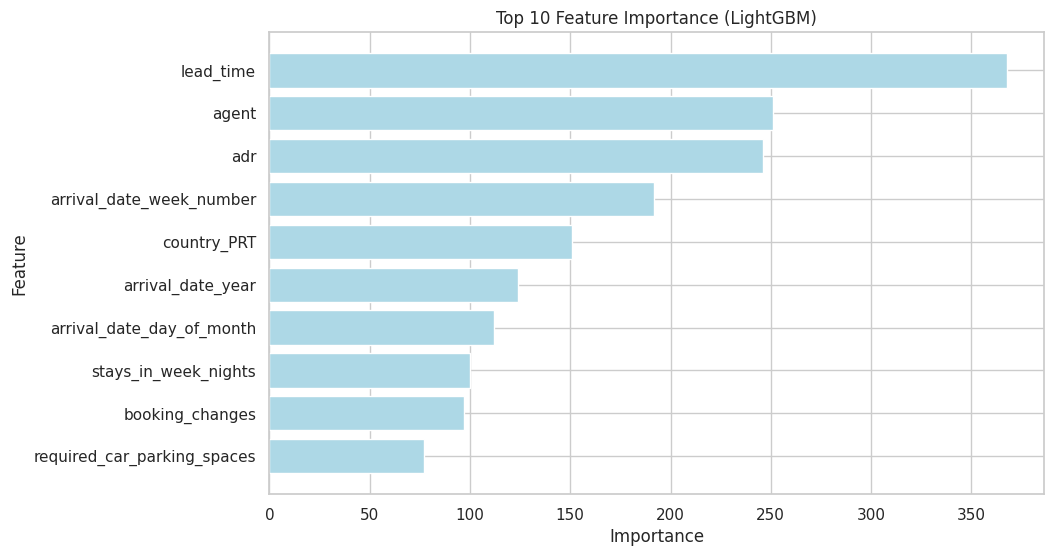

In [100]:
# Fit model LightGBM dengan data training
lgbm_model.fit(X_train_preprocessed_df, y_train)

feature_importances = lgbm_model.feature_importances_
features = X_train_preprocessed_df.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Top 10 Features berdasarkan Importance:")
print(importance_df.head(10))

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='lightblue')
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importance (LightGBM)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Berdasarkan analisis feature importance, dapat kita temukan:

- `lead_time` adalah fitur paling berpengaruh dengan skor importance sebesar 368, menunjukkan bahwa durasi waktu antara pemesanan dan tanggal kedatangan sangat memengaruhi kemungkinan pembatalan.
- `agent` menjadi fitur kedua dengan skor importance 251, yang mengindikasikan bahwa sumber pemesanan (agen atau platform) memiliki pengaruh besar terhadap keputusan pembatalan.
- `adr` (average daily rate) berada di urutan ketiga dengan skor importance 246, menunjukkan bahwa harga harian rata-rata akomodasi berkontribusi signifikan terhadap pembatalan.
- `arrival_date_week_number` memiliki skor 192, mengindikasikan bahwa waktu dalam setahun (minggu tertentu) juga memengaruhi keputusan pembatalan, mungkin terkait dengan musim atau tren liburan.
- `country_PRT` (Portugal) dengan skor 151 menunjukkan bahwa lokasi geografis tamu memainkan peran penting, khususnya bagi tamu yang berasal dari Portugal.
- `arrival_date_year` memiliki importance 124, yang mengindikasikan adanya pengaruh tahunan terhadap tren pembatalan.
- `arrival_date_day_of_month` dengan skor 112 menunjukkan bahwa tanggal tertentu dalam bulan mungkin memengaruhi pembatalan, kemungkinan terkait dengan perilaku tamu.
- `stays_in_week_nights` (jumlah malam menginap selama hari kerja) mencatat skor 100, yang berarti lama menginap juga relevan terhadap pembatalan.
- `booking_changes` dengan skor 97 menunjukkan bahwa jumlah perubahan pada pemesanan terkait dengan kemungkinan pembatalan.
- `required_car_parking_spaces` memiliki skor 77, mengindikasikan bahwa kebutuhan parkir mungkin memengaruhi keputusan pembatalan.

Dari analisis ini, fitur seperti lead_time, agent, dan adr menjadi fokus utama karena kontribusi signifikan mereka terhadap pembatalan. Insight ini dapat digunakan untuk strategi mitigasi, seperti menyesuaikan kebijakan pembatalan atau memberikan insentif kepada tamu berdasarkan durasi pemesanan dan sumber pemesanan.

##5. Summary of Findings

###5.1 Key Insights

####Data Analysis Part



1.   Tamu umumnya menginap di hotel antara 1-4 hari
2.   Terapat trend seasonal dimana jumlah tamu naik pada musim semi hingga musim gugur (Maret - Oktober)
3. Trend jumlah tamu menaik dari tahun ke tahun
Online TA
4. Fitur yang berkorelasi positif (atau negatif jika dituliskan) dengan cancellation:

    * Children & Babies: -
    * Hotel type: City hotel
    * Market Segment & Dist. Channels: Online TA dan TA/TO, Groups
    * Deposit Type: No Deposit
    * Lead Time: korelasi positif
    * Seasonal: -
    * Length of Stay: korelasi positif
    * Meal Type: -
    * Countries: PRT
    * Repeated Guests: tamu baru
    * Previous Cancellations: pernah cancel
    * Room Type Match: -
    * Booking Changes: -
    * Waiting List: -
    * Customer Type: Transient
    * ADR: korelasi positif



#### Machine Learning Model

Key Insights
1. Model Evaluation
- **LightGBM** adalah model terbaik dengan recall tertinggi pada kelas minoritas (Class 1) sebesar 63.29%.
- Model ini juga memiliki rata-rata recall (Avg Recall) tertinggi, yaitu 76.33%, menunjukkan performa yang seimbang dalam mendeteksi pembatalan dan non-pembatalan.
- Meskipun Random Forest dan XGBoost memiliki performa mendekati LightGBM, kemampuan mereka untuk mendeteksi pembatalan sedikit lebih rendah (Recall Class 1: 58.11% dan 58.75%).
2. Feature Importance
- `lead_time` adalah fitur paling penting dalam memprediksi pembatalan dengan skor importance tertinggi (368), menunjukkan bahwa durasi waktu antara pemesanan dan tanggal kedatangan sangat memengaruhi keputusan pembatalan.
- `agent` adalah fitur kedua dengan skor (251), mengindikasikan bahwa sumber pemesanan (agen atau platform) memainkan peran besar dalam pembatalan.
- `adr` (average daily rate) memiliki skor tinggi (246), yang menunjukkan bahwa harga harian rata-rata akomodasi sangat relevan terhadap pembatalan.
- Fitur geografis seperti `country_PRT` (Portugal) juga signifikan (151), mengindikasikan kemungkinan adanya pola perilaku tamu berdasarkan asal negara.
- Variabel terkait waktu, seperti `arrival_date_week_number` dan `arrival_date_year`, juga memiliki pengaruh yang signifikan terhadap pembatalan.

###5.2 Recommendations

####Data Analysis Part

1.	Bagi 'City Hotel', perlu adanya kebijakan pembatalan yang fleksibel dan menguntungkan hotel (misalnya wajib deposit dan pemotongan deposit jika batal), serta menganalisis penyebab pembatalan agar dapat memberikan insentif bagi Tamu supaya tidak membatalkan booking hotel mereka. Fasilitas yang dibutuhkan pebisnis dapat dikembangkan untuk nilai tambah (seperti WiFi cepat dan quiet room)

2.	Bagi 'Resort Hotel', jumlah Tamu dapat lebih ditingkatkan. Misalnya dengan cara berkampanye dan promosi hotel pada waktu-waktu liburan dengan membuat aktivitas ramah keluarga, bekerja sama dengan badan turisme setempat dalam membuat paket wisata yang menarik, dan memberikan program loyalitas kepada Tamu yang setia.

3.	Mengingat Tamu 'TA/TO' (terutama yang Online) dan 'Groups' cukup banyak jumlahnya dan pembatalannya, hotel perlu mempertimbangkan kebijakan pembatalan  yang lebih ketat untuk mengurangi tingkat pembatalan ini, ataupun memberikan program loyalitas kepada Tamu yang setia. Dapat dipikirkan juga kebijakan reschedule.

4.	Hotel dapat menerapkan diskon jika pelanggan melakukan reservasi dengan deposit (baik 'refundable' ataupun 'non-refundable'). Selain itu, hotel juga dapat memberikan kebijakan tenggat waktu pembatalan yang ketat untuk pemesanan dengan tipe 'no deposit' (atau harga yang lebih mahal).

5.	Memberikan fasilitas reschedule dapat dipertimbangkan apabila sebab pembatalan ialah perubahan rencana yang mendadak (tentunya lebih baik jika diterapkan untuk Tamu yang membayar deposit).

6.	Memberikan promosi ataupun diskon dapat dilakukan, apabila hotel ingin mendapatkan lebih banyak Tamu dengan Length of Stay yang panjang.

7.	Memberikan promosi khusus untuk orang lokal dapat dipertimbangkan untuk mendapatkan pelanggan lokal yang loyal dimasa depan. Selain itu, dapat dipertimbangkan bagi hotel untuk membuat strategi penarikan turis-turis dari luar negeri (di negara yang cancellation ratenya lebih rendah).

8.	Memberikan promosi khusus untuk Repeated guests perlu dipertimbangkan untuk menambah dan meningkatkan loyalitas pelanggan. Peningkatan fasilitas yang diperlukan oleh Repeated guests juga perlu dipikirkan oleh pihak hotel.

9.	Analisis lebih lanjut dengan binning antara 0 dan 1 untuk data Previous Cancellations
10.	Analisis lebih lanjut untuk data ADR, terutama analisis seasonal untuk membuat keputusan dalam strategi promosi hotel.




#### Machine Learning

Recommendations
1. Kebijakan Pemesanan
- Optimalkan kebijakan pembatalan untuk pemesanan dengan lead time yang sangat panjang:
  - Berikan insentif (seperti diskon atau fleksibilitas tambahan) untuk pemesanan dengan lead time panjang agar pelanggan lebih termotivasi untuk tetap melanjutkan perjalanan.
  - Terapkan kebijakan pembatalan lebih ketat untuk pemesanan dengan lead time sangat pendek yang menunjukkan potensi pembatalan tinggi.
2. Segmentasi Berdasarkan Sumber Pemesanan
- Fokus pada platform atau agen tertentu yang memiliki tingkat pembatalan tinggi.
  - Lakukan analisis mendalam terhadap agen dengan kontribusi pembatalan terbesar (fitur `agent`).
  - Kerjasama dengan agen tersebut untuk memberikan insentif tambahan bagi pelanggan agar tidak membatalkan.
3. Penyesuaian Harga
- Evaluasi harga harian rata-rata (adr) pada segmen dengan tingkat pembatalan tinggi:
  - Pertimbangkan diskon khusus untuk tamu dengan harga harian tinggi, terutama jika berasal dari agen atau negara tertentu yang memiliki pola pembatalan signifikan.
4. Analisis Geografis
- Tamu dari Portugal (`country_PRT`) memiliki pengaruh signifikan terhadap pembatalan:
  - Fokus pada strategi pemasaran dan retensi khusus untuk tamu dari wilayah ini.
  - Analisis lebih lanjut tentang alasan spesifik perilaku pembatalan dari negara ini.
5. Pengelolaan Perubahan Pemesanan
- Fitur `booking_changes` menunjukkan hubungan yang kuat dengan pembatalan:
  - Tinjau proses perubahan pemesanan dan buat lebih efisien untuk mengurangi ketidakpuasan pelanggan.
  - Berikan opsi yang memotivasi tamu untuk tetap melanjutkan pemesanan meskipun ada perubahan.

Hasil ini memberikan insight mendalam tentang faktor-faktor utama yang memengaruhi pembatalan pemesanan. Dengan menggunakan LightGBM sebagai model terbaik dan memanfaatkan feature importance, langkah-langkah strategis dapat diambil untuk:

- Mengurangi tingkat pembatalan.
- Meningkatkan pengalaman pelanggan.
- Mengoptimalkan pendapatan melalui pengelolaan harga, kebijakan pembatalan, dan hubungan dengan agen pemesanan.